# **PROYECTO: "Generación de estrategias para usar al máximo los recursos disponibles en el Perú para Salud Mental"**

Link de los datos
> https://www.datosabiertos.gob.pe/dataset/minsa-salud-mental


Existen 3 datas existentes:
- **ATENDIDOS** 

  Atenciones de Salud Mental entre enero y la quincena de setiembre del 2017
  
  
- **MAMIS** (Módulos de Atención al Maltrato Infantil )

  MAMIS es una estrategia para abordar las políticas de salud vinculadas con la recuperación de los niños (as) y adolescentes víctimas de la violencia
  

- **TAMIZAJE**

  Tamizaje son mediciones para establecer quién puede padecer cierta enfermedad y quién no.

# Importacion de Librerias

In [1]:
#Importacion de Librerias
import numpy as np # Manejo de matrices (matematica)
import pandas as pd # Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas mas sencillas basada en matplotlib
import os # Para la lectura de nuestos archivos

#  biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python
import pylab as pl # libreria para graficos
# import matplotlib as mpl

# Funciones

In [2]:
def analizadorNulos(data):
    
    qFilas, qColumnas = data.shape
    if data.isnull().any().any():
        view_info = pd.DataFrame(pd.concat([data.isnull().any(), data.isnull().sum(), 
                                            round(data.isnull().sum() / qFilas * 100, 2), data.dtypes], axis=1))
        view_info.columns = ['Nulos', 'Cantidad', '%_Nulos', 'Tipo_Dato']
        view_info.sort_values(by='%_Nulos', ascending = False, inplace = True)
        display(view_info[view_info['Cantidad'] > 0])
        #Graficando el porcentaje de nulos
        plt.figure(figsize=(10,7))
        plt.title('Porcentaje de Nulos', fontsize = 15)
        plt.grid(True)
        plt.yticks(range(qColumnas + 1, 1 , -1), view_info.index, fontsize=20)
        plt.xlabel("Porcentaje de Nulos",fontsize=15)
        plt.ylabel("Variables\n",fontsize=20)
        #plt.xlim(0,100)
        plt.barh(range(qColumnas + 1, 1 , -1), width=view_info['%_Nulos'],height=0.5)
        #print(list(enumerate(view_info['%_Nulos'], 1)))
        for i, txt in enumerate(view_info['%_Nulos']):
          plt.annotate(str(txt) + '%', (txt, (qColumnas + 1 - i) ), fontsize = 12)
    else:
        print("No existen Nulos")

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS'] 
  #display(frecuencia_absoluta)
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL'] 
  #display(frecuencia_relativa)
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  #Graficando las distribuciones
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'])
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

def analisisNumericas(df, variable):

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisBivariante(data, variable, target, qCortes = 0):
    
    df = data.copy()
    if qCortes > 0:
      df[variable] = pd.qcut(df[variable], qCortes, duplicates='drop')
      df[variable] = df[variable].astype('str')
    if df[variable].isnull().any():
      df[variable] = df[variable].astype('str')
    prueba = pd.concat([df.groupby(variable).sum()[[target]].sort_index(),
                        df[variable].value_counts()], axis = 1)
    prueba['%_Target'] = prueba[target] / prueba[variable]
    display(prueba)
    #Graficando las distribuciones
    plt.bar(x = prueba.index, height = prueba[variable])
    plt.grid(True)
    if qCortes > 0:
      plt.xticks(rotation=-45)
    for i, txt in enumerate(prueba[variable]):
      plt.annotate(str(txt), (i, txt), fontsize = 12)
    #plt.title(variable)
    plt.twinx()
    plt.plot(prueba['%_Target'], linestyle='-', linewidth=2.0, color='red')
    plt.ylim(0, 1)
    for i, txt in enumerate(prueba['%_Target']):
      plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')

    # sns.boxplot(x='response', y=columna, data=df)
    plt.show()

# 1.- Comprension del Negocio

Según el informe del MINSA se señala que se necesita entre el 5% y el 15% del presupuesto nacional para abordar la problematica de salud mental. En el 2018 este solo represento el 0.1%. 

**Se busca maximizar esos recursos disponibles para asi poder reducir el numero de casos con algun tipo de diagnostico de Salud Mental.**

# 2.- Comprension de los Datos

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

## 2.1.- Recopilacion de los Datos

In [31]:
# -- Importar los datos desde el drive
# ROOT_PATH = "..."

# -- Importar los datos desde el computador
ROOT_PATH = "./dataset/"

DATA_TAMIZAJE = os.path.join(ROOT_PATH, "saludMental-TAMIZAJE.csv") # DATA INICIAL DE DATOS ABIERTOS
dataset_tamizaje = pd.read_csv(DATA_TAMIZAJE, sep = ",")

In [32]:
# Visualizamos los datos
dataset_tamizaje.head()

,Anio,NroMes,ubigeo,Departamento,Provincia,Distrito,Sexo,Etapa,GrupoTamizaje,DetalleTamizaje,Casos
0,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,18 - 24,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,17
1,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,SOLO TAMIZAJES POSITIVOS,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1
2,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,TOTAL DE TAMIZAJES,TRASTORNO DEPRESIVO,2
3,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,80 +,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,1
4,2017,1,20101,ANCASH,HUARAZ,HUARAZ,M,30 - 39,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,7


### Cambiando de nombre a mis variables para que sean mas descriptivas

In [33]:
# Cambiando nombre de las variables
dataset_tamizaje.columns = ['Anio', 'NroMes', 'Ubigeo', 'Departamento', 'Provincia', 'Distrito',
                            'Sexo', 'RangoEdad','ResultTamizaje', 'TipoDiagnostico', 'NroTamizajes']

# Agregando titulo a la comuna y al indice
dataset_tamizaje.columns.name = "Tamizaje 2017"
dataset_tamizaje.index.name = "Registro"
dataset_tamizaje.head()

Tamizaje 2017,Anio,NroMes,Ubigeo,Departamento,Provincia,Distrito,Sexo,RangoEdad,ResultTamizaje,TipoDiagnostico,NroTamizajes
Registro,,,,,,,,,,,
0,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,18 - 24,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,17
1,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,SOLO TAMIZAJES POSITIVOS,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1
2,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,TOTAL DE TAMIZAJES,TRASTORNO DEPRESIVO,2
3,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,80 +,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,1
4,2017,1,20101,ANCASH,HUARAZ,HUARAZ,M,30 - 39,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,7


In [34]:
dataset_tamizaje.columns

Index(['Anio', 'NroMes', 'Ubigeo', 'Departamento', 'Provincia', 'Distrito',
       'Sexo', 'RangoEdad', 'ResultTamizaje', 'TipoDiagnostico',
       'NroTamizajes'],
      dtype='object', name='Tamizaje 2017')

In [35]:
dataset_tamizaje.head()

Tamizaje 2017,Anio,NroMes,Ubigeo,Departamento,Provincia,Distrito,Sexo,RangoEdad,ResultTamizaje,TipoDiagnostico,NroTamizajes
Registro,,,,,,,,,,,
0,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,18 - 24,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,17
1,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,SOLO TAMIZAJES POSITIVOS,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1
2,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,TOTAL DE TAMIZAJES,TRASTORNO DEPRESIVO,2
3,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,80 +,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,1
4,2017,1,20101,ANCASH,HUARAZ,HUARAZ,M,30 - 39,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,7


In [36]:
dataset_tamizaje

Tamizaje 2017,Anio,NroMes,Ubigeo,Departamento,Provincia,Distrito,Sexo,RangoEdad,ResultTamizaje,TipoDiagnostico,NroTamizajes
Registro,,,,,,,,,,,
0,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,18 - 24,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,17
1,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,SOLO TAMIZAJES POSITIVOS,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1
2,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,TOTAL DE TAMIZAJES,TRASTORNO DEPRESIVO,2
3,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,80 +,TOTAL DE TAMIZAJES,SINDROME Y/O TRASTORNO PSICOTICO,1
4,2017,1,20101,ANCASH,HUARAZ,HUARAZ,M,30 - 39,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,7
...,...,...,...,...,...,...,...,...,...,...,...
236522,2017,9,220201,SAN MARTIN,BELLAVISTA,BELLAVISTA,F,1 - 4,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1
236523,2017,9,220201,SAN MARTIN,BELLAVISTA,BELLAVISTA,F,15 - 17,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,2
236524,2017,9,220201,SAN MARTIN,BELLAVISTA,BELLAVISTA,F,25 - 29,TOTAL DE TAMIZAJES,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1


In [37]:
# Nuestro dataframe dataset_tamizaje la llamaremos df para facilidad de manejo
df_initial = dataset_tamizaje

# Observaremos la cantidad de datos que tenemos 
# 236 527 datos 
# 11 features
df_initial.shape

(236527, 11)

### Armando nuestro nuevo DATASET

In [38]:
# Vamos a hacer una COPIA del dataframe TAMIZAJE
dataset_tamizajeP= df_initial.copy(deep=True)

In [39]:
# Nos quedaremos SOLO con los datos con TAMIZAJES POSITIVOS
df_p = dataset_tamizajeP
df_p = df_initial.drop(df_initial[df_initial['ResultTamizaje']!="SOLO TAMIZAJES POSITIVOS"].index)

In [40]:
# Observaremos la cantidad de datos que tenemos de nuestro nuevo dataser solo TAMIZAJES POSITIVOS
# 34 977 datos 
# 11 features
df_p.shape

(34977, 11)

In [41]:
# dataframe de departamento e distrito agrupado con el feature TipoDiagnostico 
diagnosticos_tamizajePositivo = pd.crosstab(index=[df_initial["Departamento"],df_p["Distrito"]],
                columns=[df_p['TipoDiagnostico'],],
                values=df_p['NroTamizajes'],aggfunc='sum')
diagnosticos_tamizajePositivo = diagnosticos_tamizajePositivo.fillna(0)
diagnosticos_tamizajePositivo

# dataframe de departamento e distrito agrupado con el feature ResultTamizaje 
result_tamizajeTotal = pd.crosstab(index=[df_initial["Departamento"],df_initial["Distrito"]],
                columns=[df_initial['ResultTamizaje']],
                values=df_initial['NroTamizajes'],aggfunc='sum')
result_tamizajeTotal = result_tamizajeTotal.fillna(0)
result_tamizajeTotal


# Uresult_tamizajeTotalNION de los 2 dataframes anteriores
# Se obtendra una tabla con departamento e distrito con los sgtes features:
# todos los diferentes tipos  del feature TipoDiagnostico y
# todos los diferentes tipos  del feature ResultTamizaje
df_result_diagnostico = pd.merge(diagnosticos_tamizajePositivo,result_tamizajeTotal, on=['Departamento','Distrito'], how='outer')
df_result_diagnostico = df_result_diagnostico.fillna(0)

df_result_diagnostico # NUEVO DATAFRAME -- SE TRABAJARA CON ESTE !!

SINDROME Y/O TRASTORNO PSICOTICO  \
Departamento Distrito                                       
ANCASH       ACOPAMPA                                12.0   
             ANTA                                     0.0   
             ATAQUERO                                 0.0   
             CAJACAY                                  0.0   
             CARHUAZ                                  6.0   
...                                                   ...   
TACNA        ILABAYA                                  0.0   
             QUILAHUANI                               0.0   
             SITAJARA                                 0.0   
UCAYALI      IPARIA                                   0.0   
             MASISEA                                  0.0   

                         TRASTORNO DE CONSUMO DE ALCOHOL  \
Departamento Distrito                                      
ANCASH       ACOPAMPA                                2.0   
             ANTA                                    8.0   
             ATAQUERO                                0.0   
             CAJACAY                                 1.0   
             CARHUAZ                                34.0   
...                                                  ...   
TACNA        ILABAYA                                 0.0   
             QUILAHUANI                              0.0   
             SITAJARA                                0.0   
UCAYALI      IPARIA                                  0.0   
             MASISEA                                 0.0   

                         TRASTORNO DE CONSUMO DE DROGAS  \
Departamento Distrito                                     
ANCASH       ACOPAMPA                               0.0   
             ANTA                                   0.0   
             ATAQUERO                               0.0   
             CAJACAY                                0.0   
             CARHUAZ                                3.0   
...                                                 ...   
TACNA        ILABAYA                                0.0   
             QUILAHUANI                             0.0   
             SITAJARA                               0.0   
UCAYALI      IPARIA                                 0.0   
             MASISEA                                0.0   

                         TRASTORNO DE CONSUMO DE TABACO  TRASTORNO DEPRESIVO  \
Departamento Distrito                                                          
ANCASH       ACOPAMPA                               0.0                 12.0   
             ANTA                                   3.0                  0.0   
             ATAQUERO                               0.0                  0.0   
             CAJACAY                                0.0                  0.0   
             CARHUAZ                                0.0                 33.0   
...                                                 ...                  ...   
TACNA        ILABAYA                                0.0                  0.0   
             QUILAHUANI                             0.0                  0.0   
             SITAJARA                               0.0                  0.0   
UCAYALI      IPARIA                                 0.0                  0.0   
             MASISEA                                0.0                  0.0   

                         VIOLENCIA FAMILIAR/MALTRATO INFANTIL  \
Departamento Distrito                                           
ANCASH       ACOPAMPA                                    13.0   
             ANTA                                         7.0   
             ATAQUERO                                     1.0   
             CAJACAY                                      0.0   
             CARHUAZ                                     89.0   
...                                                       ...   
TACNA        ILABAYA                                      0.0   
             QUILAHUANI                                 

In [42]:
# Guardando nuestro nuevo Dataset como archivo csv

# -- guardar los datos en el drive
# df_result_diagnostico.to_csv(r'....', index = True)

# -- guardar los datos en el computador
# df_result_diagnostico.to_csv(r'./dataset/saludMental-DATATAMIZAJE.csv', index = True)

print(" Todo ok !!")

 Todo ok !!


In [43]:
# Llamando a nuestro nuevo Dataset

DATA_TAMIZAJE_GENERADO = os.path.join(ROOT_PATH, "saludMental-DATATAMIZAJE.csv") # DATA INICIAL DE DATOS ABIERTOS
dataset_tamizaje_generado = pd.read_csv(DATA_TAMIZAJE_GENERADO, sep = ",")

In [44]:
# Visualizamos el nuevo dataframe 

dataset_tamizaje_generado.columns.name = "Tamizaje 2017"
dataset_tamizaje_generado.head(5)
dataset_tamizaje_generado.set_index('Distrito')

Tamizaje 2017,Departamento,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES
Distrito,,,,,,,,,,
ACOPAMPA,ANCASH,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0
ANTA,ANCASH,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0
ATAQUERO,ANCASH,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0
CAJACAY,ANCASH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0
CARHUAZ,ANCASH,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0
...,...,...,...,...,...,...,...,...,...,...
ILABAYA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.0
QUILAHUANI,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0
SITAJARA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0


### Renombrando a los 2 dataframe para facilidad de uso

In [45]:
# DATAFRAME inicial extraida directamente del MINSA se llamara solo df_i
dfi = dataset_tamizaje

# DATAFRAME GENERADO se llamara solo df
df = dataset_tamizaje_generado

## 2.2.- Descripcion de los Datos

Los dataset que se ven a continuación son de la data original y como el nuevo dataset esta saliendo de estas variables se van a mantener los nombres de las variables asi que es de interes conocerlas y saber que significa cada una de ellas

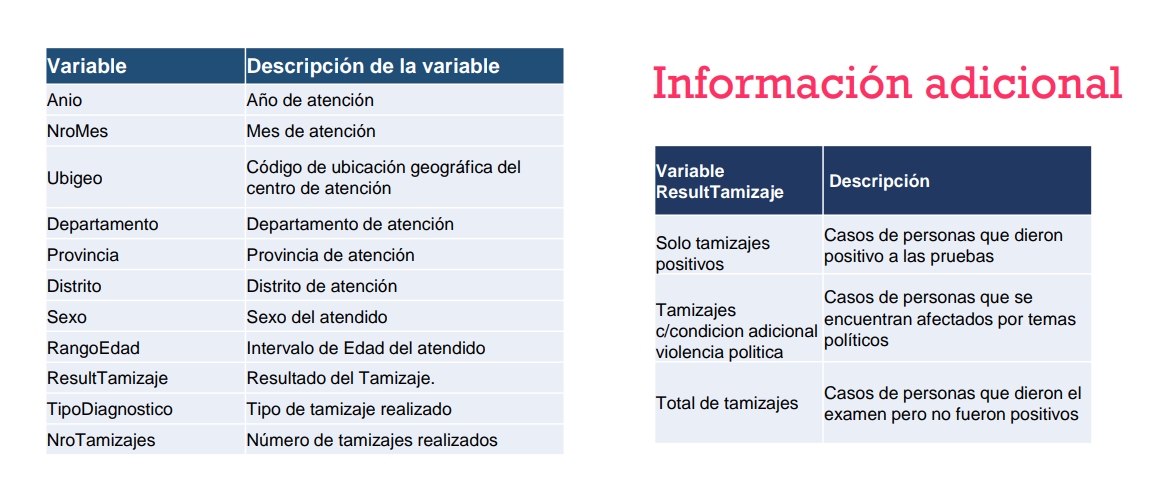

## 2.3.- Exploracion de los Datos

**Aplicaremos diversas técnicas estadísticas para conocer más a profundidad los datos**

### 2.3.1.- Analisis de Nulos

In [46]:
analizadorNulos(dfi) # DATAFRAME inicial

No existen Nulos


In [47]:
analizadorNulos(df) # DATAFRAME GENERADO

No existen Nulos


In [48]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236527 entries, 0 to 236526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Anio             236527 non-null  int64 
 1   NroMes           236527 non-null  int64 
 2   Ubigeo           236527 non-null  int64 
 3   Departamento     236527 non-null  object
 4   Provincia        236527 non-null  object
 5   Distrito         236527 non-null  object
 6   Sexo             236527 non-null  object
 7   RangoEdad        236527 non-null  object
 8   ResultTamizaje   236527 non-null  object
 9   TipoDiagnostico  236527 non-null  object
 10  NroTamizajes     236527 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.9+ MB


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Departamento                                        1113 non-null   object 
 1   Distrito                                            1113 non-null   object 
 2   SINDROME Y/O TRASTORNO PSICOTICO                    1113 non-null   float64
 3   TRASTORNO DE CONSUMO DE ALCOHOL                     1113 non-null   float64
 4   TRASTORNO DE CONSUMO DE DROGAS                      1113 non-null   float64
 5   TRASTORNO DE CONSUMO DE TABACO                      1113 non-null   float64
 6   TRASTORNO DEPRESIVO                                 1113 non-null   float64
 7   VIOLENCIA FAMILIAR/MALTRATO INFANTIL                1113 non-null   float64
 8   SOLO TAMIZAJES POSITIVOS                            1113 non-null   float64
 9

In [50]:
# Definimos las variables que trataremos como numericas y como categoricas de nuesto dataset generado
varCategoricas = ['Distrito','Departamento']
varNumericas = ['SINDROME Y/O TRASTORNO PSICOTICO',
       'TRASTORNO DE CONSUMO DE ALCOHOL', 'TRASTORNO DE CONSUMO DE DROGAS',
       'TRASTORNO DE CONSUMO DE TABACO', 'TRASTORNO DEPRESIVO',
       'VIOLENCIA FAMILIAR/MALTRATO INFANTIL', 'SOLO TAMIZAJES POSITIVOS',
       'TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA',
       'TOTAL DE TAMIZAJES']

### 2.3.2.- Analisis Univariante

**El objetivo de este analisis es caracterizar a las variables por sus estadisticos resumen principales (media, mediana, moda, etc)**

#### 2.3.2.1.- Analisis Univariante Categoricas

-------------------- Distrito --------------------


,FREC_ABS,FREC_REL
SANTA ROSA,5,0.004492
PALCA,4,0.003594
SANTA CRUZ,3,0.002695
SAN LUIS,3,0.002695
INDEPENDENCIA,3,0.002695
...,...,...
CHINCHEROS,1,0.000898
CHAPIMARCA,1,0.000898
OCUVIRI,1,0.000898
CHANGUILLO,1,0.000898


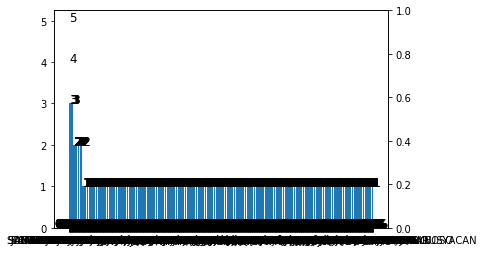




-------------------- Departamento --------------------


,FREC_ABS,FREC_REL
JUNIN,121,0.108715
AYACUCHO,115,0.103324
HUANCAVELICA,95,0.085355
PUNO,90,0.080863
CUSCO,87,0.078167
APURIMAC,81,0.072776
HUANUCO,78,0.070081
SAN MARTIN,64,0.057502
ANCASH,62,0.055705
AREQUIPA,49,0.044025


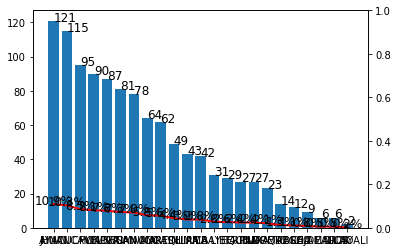

In [51]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*20,categorica,"-"*20)
    analisisCategoricas(df, categorica)
    print("\n\n")

#### 2.3.2.2.- Analisis Univariante Numericas

In [52]:
# Hacemos un analisis de Percentiles
df[varNumericas].describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Tamizaje 2017,,,,,,,,,,
SINDROME Y/O TRASTORNO PSICOTICO,1113.0,1.622642,9.569206,0.0,0.0,0.0,0.0,0.0,7.0,197.0
TRASTORNO DE CONSUMO DE ALCOHOL,1113.0,6.871518,20.536348,0.0,0.0,0.0,1.0,5.0,33.0,353.0
TRASTORNO DE CONSUMO DE DROGAS,1113.0,2.171608,12.576465,0.0,0.0,0.0,0.0,0.0,10.0,320.0
TRASTORNO DE CONSUMO DE TABACO,1113.0,0.471698,2.230704,0.0,0.0,0.0,0.0,0.0,2.0,38.0
TRASTORNO DEPRESIVO,1113.0,28.311770,141.737423,0.0,0.0,0.0,1.0,13.0,122.0,3826.0
VIOLENCIA FAMILIAR/MALTRATO INFANTIL,1113.0,42.246181,178.667250,0.0,0.0,0.0,4.0,25.0,196.2,4842.0
SOLO TAMIZAJES POSITIVOS,1113.0,81.695418,340.480019,0.0,0.0,1.0,10.0,53.0,379.4,9346.0
TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,1113.0,5.071878,36.218813,0.0,0.0,0.0,0.0,0.0,17.4,757.0
TOTAL DE TAMIZAJES,1113.0,1844.010782,3133.245443,0.0,42.6,276.0,759.0,2077.0,6794.2,35865.0


In [53]:
# sns.pairplot(data=df[varNumericas], diag_kws={'edgecolor':'k','bins':25}, plot_kws={'edgecolor':'k'})
# plt.show()

#################### SINDROME Y/O TRASTORNO PSICOTICO ####################
                     Histograma                     


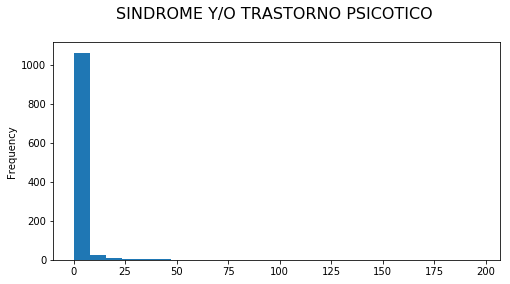



                     Boxplot                     


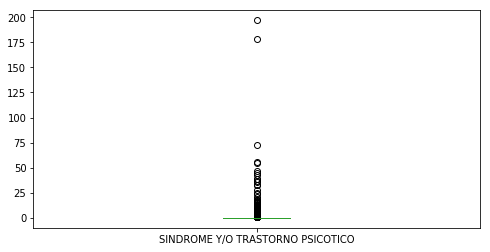




#################### TRASTORNO DE CONSUMO DE ALCOHOL ####################
                     Histograma                     


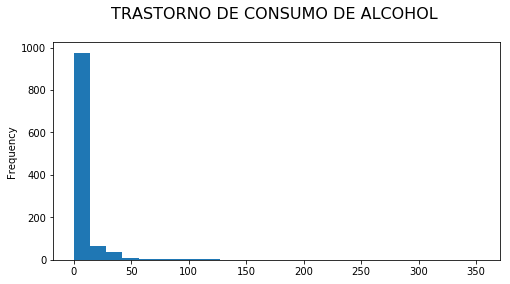



                     Boxplot                     


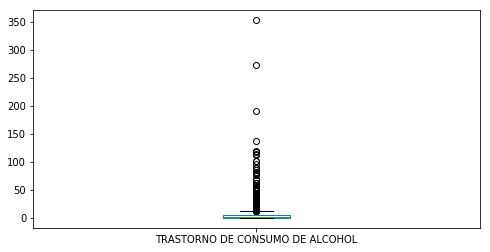




#################### TRASTORNO DE CONSUMO DE DROGAS ####################
                     Histograma                     


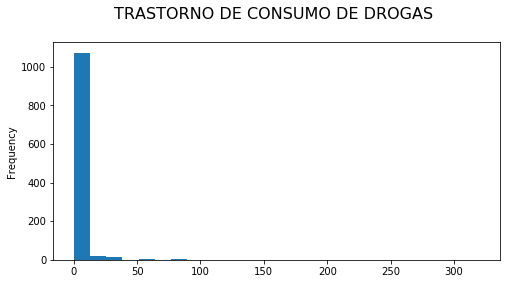



                     Boxplot                     


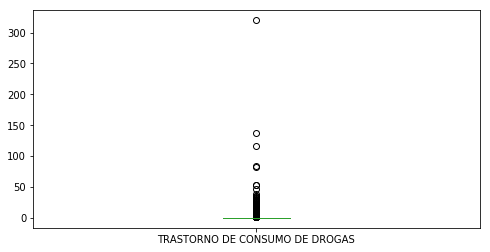




#################### TRASTORNO DE CONSUMO DE TABACO ####################
                     Histograma                     


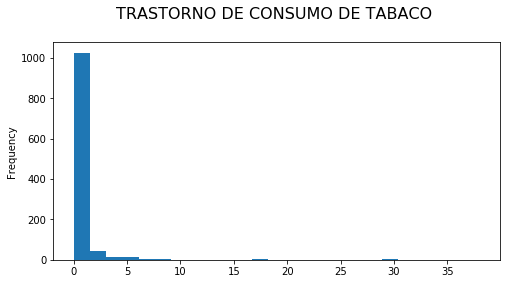



                     Boxplot                     


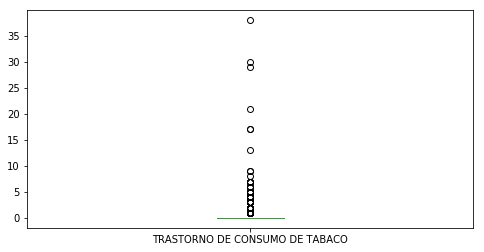




#################### TRASTORNO DEPRESIVO ####################
                     Histograma                     


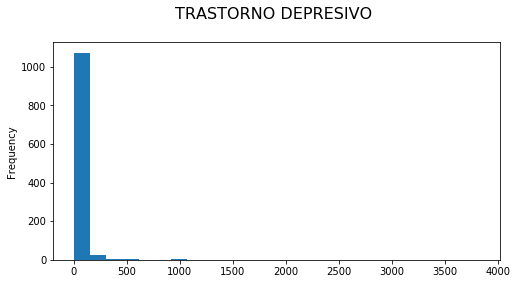



                     Boxplot                     


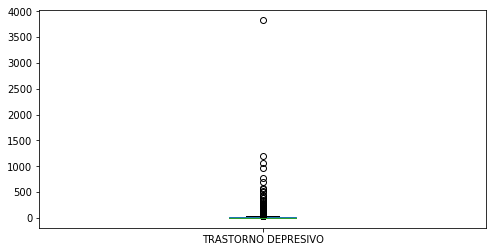




#################### VIOLENCIA FAMILIAR/MALTRATO INFANTIL ####################
                     Histograma                     


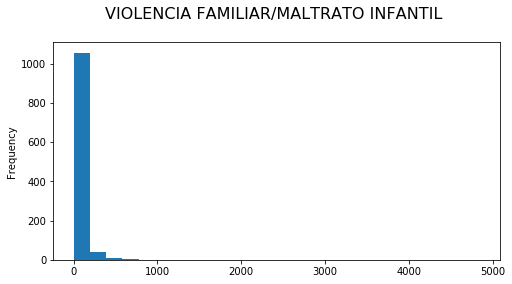



                     Boxplot                     


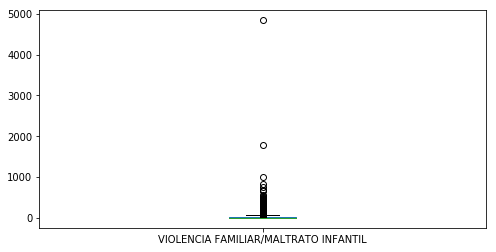




#################### SOLO TAMIZAJES POSITIVOS ####################
                     Histograma                     


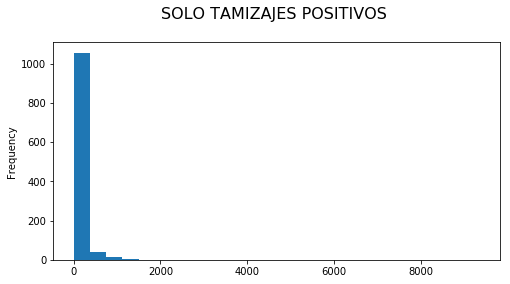



                     Boxplot                     


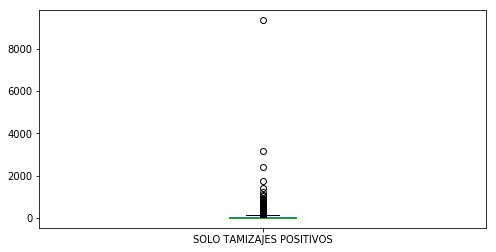




#################### TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA ####################
                     Histograma                     


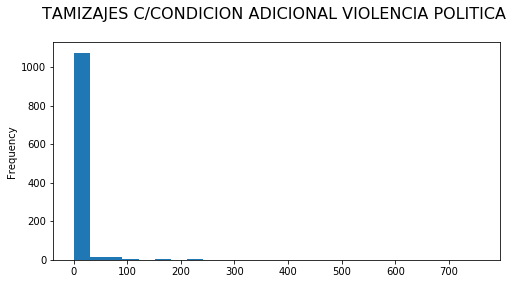



                     Boxplot                     


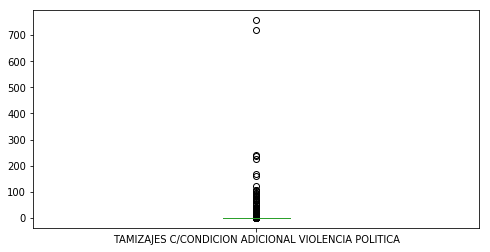




#################### TOTAL DE TAMIZAJES ####################
                     Histograma                     


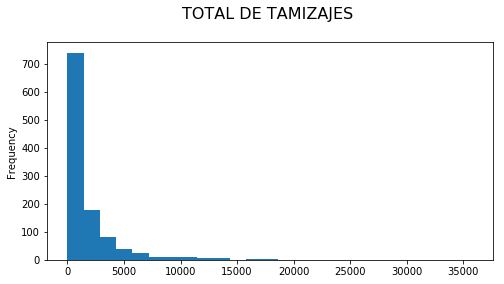



                     Boxplot                     


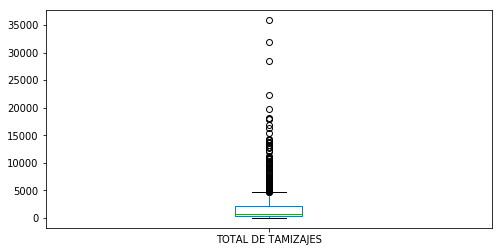

In [54]:
for numerica in varNumericas:
  print("#"*20,numerica,"#"*20)
  analisisNumericas(df, numerica)
  print("\n\n")

#### 2.3.2.2.- Analisis Univariante Target

In [55]:
# Por ser algoritmo de Metodo no supervisado no hay target

### 2.3.3.- Analisis Bivariante

**Analizamos las variables comparandolas con la variable objetivo**

Por ser algoritmo de Metodo no supervisado no tenemos variable objetivo; lo que buscamos es hacer cluster.

**Nota** Se hizo un analisos entre algunas variables de interes con el nro de casos

**TABLAS DE CONTINGENCIA**

---

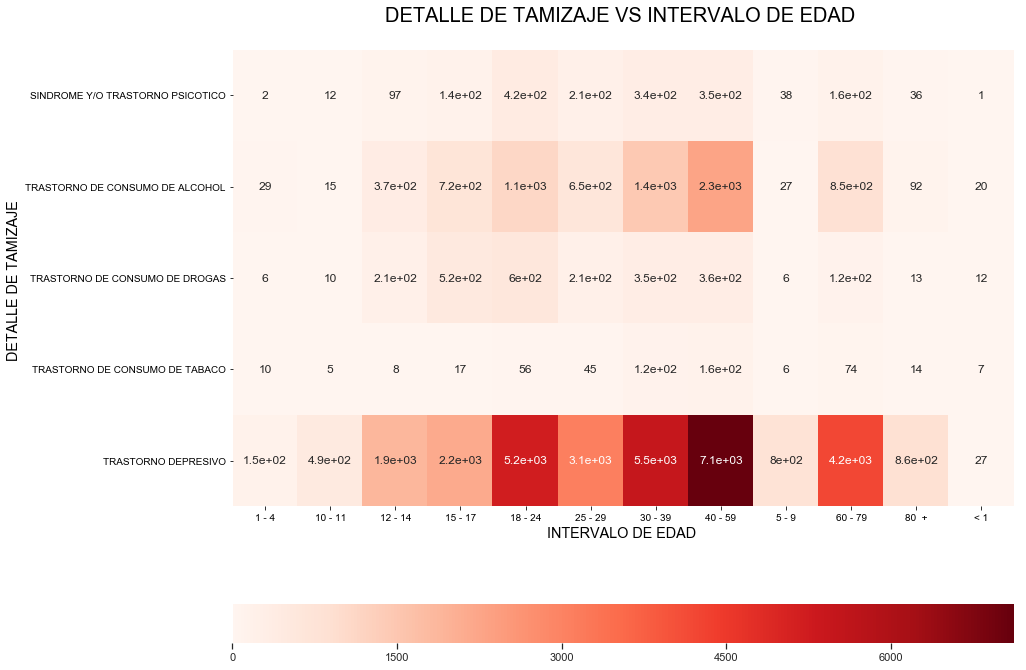

In [56]:
detalleTamizaje_Edad = pd.crosstab(index=df_p['TipoDiagnostico'],
                columns=[df_p['RangoEdad']],
                values=df_p['NroTamizajes'],aggfunc='sum')
fig, ax = plt.subplots(figsize=(14,12)) 
sns.set(font_scale=1.0)
sns.heatmap(detalleTamizaje_Edad.head(5),annot=True,cmap="Reds",
            cbar_kws={"orientation": "horizontal"},
#            yticklabels=False,xticklabels=False
           ) #cmap="YlGnBu" #YlOrBr Reds  YlGnBu

plt.title('DETALLE DE TAMIZAJE VS INTERVALO DE EDAD \n',fontdict={'fontsize':20})
plt.xlabel('INTERVALO DE EDAD ',fontsize='large')
plt.ylabel('DETALLE DE TAMIZAJE ',fontsize='large')
plt.show()

**Pruebas de independencia**

In [57]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [58]:
print(chi2_contingency(detalleTamizaje_Edad))

(18673.094904190555, 0.0, 55, array([[8.93595302e+01, 6.92988221e+01, 1.33433502e+02, 1.30374740e+02,
        2.43052361e+02, 1.49541654e+02, 2.79995843e+02, 3.28141542e+02,
        2.02851496e+02, 1.45112409e+02, 2.65754726e+01, 8.26262826e+00],
       [3.78417324e+02, 2.93464779e+02, 5.65060587e+02, 5.52107427e+02,
        1.02927157e+03, 6.33274957e+02, 1.18571883e+03, 1.38960494e+03,
        8.59030035e+02, 6.14518108e+02, 1.12541093e+02, 3.49903549e+01],
       [1.19591354e+02, 9.27437725e+01, 1.78576286e+02, 1.74482695e+02,
        3.25281039e+02, 2.00134097e+02, 3.74723119e+02, 4.39157313e+02,
        2.71479550e+02, 1.94206363e+02, 3.55663994e+01, 1.10580136e+01],
       [2.59766076e+01, 2.01450064e+01, 3.87888086e+01, 3.78996338e+01,
        7.06547560e+01, 4.34714111e+01, 8.13941404e+01, 9.53899832e+01,
        5.89684582e+01, 4.21838398e+01, 7.72542809e+00, 2.40192682e+00],
       [1.55914073e+03, 1.20912247e+03, 2.32814123e+03, 2.27477211e+03,
        4.24076575e+03, 2.6091

In [59]:
# H0: Las variables X e Y son independientes. (X e Y no están relacionadas)
# H1: Las variables X e Y no son independientes. (X e Y están relacionadas)

In [60]:
# Si el Chi-cuadrado calculado es mayor que el valor crítico, rechazamos la hipótesis nula.

chi, pval, dof, exp = chi2_contingency(detalleTamizaje_Edad)
significance = 0.05
print('p-value is: ', pval)

p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""Con %.2f  nivel de significancia, rechazamos las hipótesis nulas y aceptamos H1. 
No son independientes.""" % (significance))
else:
    print("""con %.2f level of significance, aceptamos las hipótesis nulas. 
Son independientes.""" % (significance))
    

#Alternativamente, podemos comparar el valor p y el nivel de significancia. 
#Si p-value < nivel de significancia, rechazamos la hipótesis nula.

p-value is:  0.0
chi=18673.094904, critical value=73.311493

Con 0.05  nivel de significancia, rechazamos las hipótesis nulas y aceptamos H1. 
No son independientes.


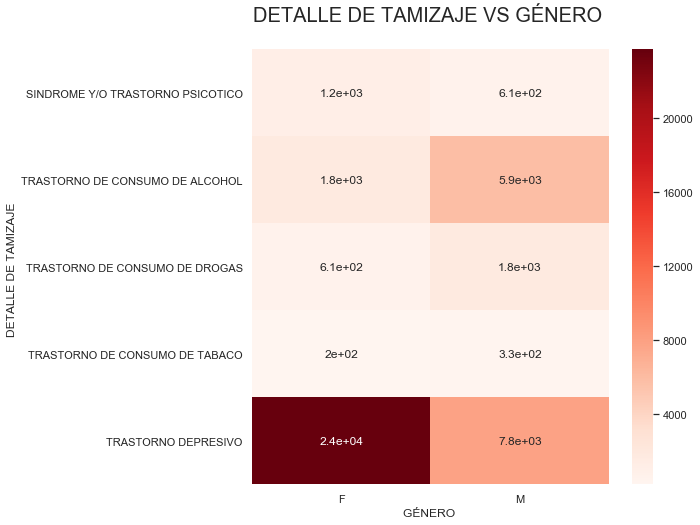

In [61]:
detalleTamizaje_sexo = pd.crosstab(index=df_p['TipoDiagnostico'],
                columns=[df_p['Sexo']],
                values=df_p['NroTamizajes'],aggfunc='sum')
fig, ax = plt.subplots(figsize=(8,8)) 
sns.set(font_scale=1)
sns.heatmap(detalleTamizaje_sexo.head(5),annot=True,cmap="Reds",
#             cbar_kws={"orientation": "horizontal"},
#            yticklabels=False,xticklabels=False
           ) #cmap="YlGnBu" #YlOrBr Reds  YlGnBu

plt.title('DETALLE DE TAMIZAJE VS GÉNERO \n',fontdict={'fontsize':20})
plt.xlabel('GÉNERO ')
plt.ylabel('DETALLE DE TAMIZAJE ')
plt.show()

In [62]:
# Si el Chi-cuadrado calculado es mayor que el valor crítico, rechazamos la hipótesis nula.

chi, pval, dof, exp = chi2_contingency(detalleTamizaje_sexo)
significance = 0.05
print('p-value is: ', pval)

p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""Con %.2f  nivel de significancia, rechazamos las hipótesis nulas y aceptamos H1. 
No son independientes.""" % (significance))
else:
    print("""At %.2f level of significance, aceptamos las hipótesis nulas. 
Son independientes.""" % (significance))

p-value is:  0.0
chi=9055.297089, critical value=11.070498

Con 0.05  nivel de significancia, rechazamos las hipótesis nulas y aceptamos H1. 
No son independientes.


### 2.3.4.- Analisis de Correlaciones

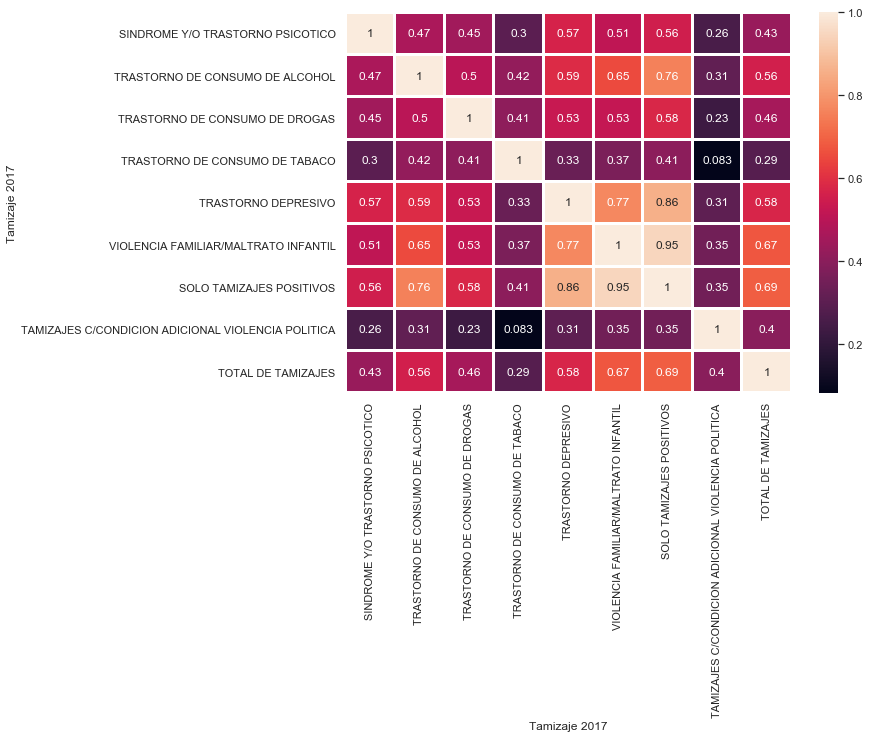

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(df[varNumericas].corr(method='spearman'), annot=True, linewidths=2)

### 2.3.5 Adicional - analisis 


**Graficando mis datos dependiendo de la naturaleza de la variable**

#### Variable ResultTamizaje

In [64]:
# pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [65]:
from pywaffle import Waffle

/home/mayu/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


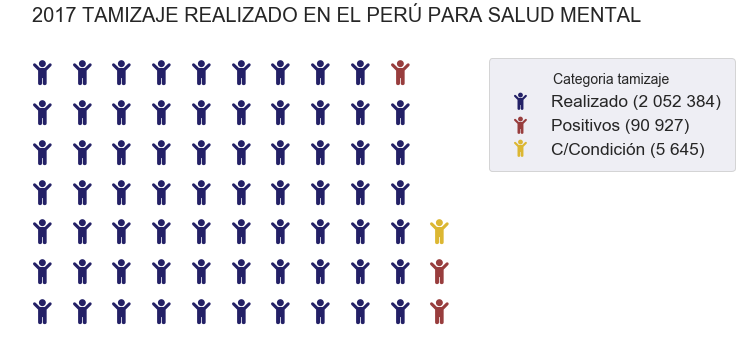

In [66]:
data = {'Realizado (2 052 384)': 68.412800, 'Positivos (90 927)': 3.030900, 'C/Condición (5 645) ':  0.188167}
fig = plt.figure(
   FigureClass=Waffle, 
    rows=7,
    figsize=(10, 5),
    values=data,
    colors=("#232066", "#983D3D", "#DCB732"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.04, 1),'borderpad':0.8,
            'fontsize': 12,'title':'Categoria tamizaje','fontsize':'x-large','title_fontsize':14
           },
    icons='child', icon_size=25, 
    icon_legend=True,
    title = {'label': '2017 TAMIZAJE REALIZADO EN EL PERÚ PARA SALUD MENTAL \n', 'loc': 'left','fontsize': 20}
)

#### Variable Departamento

In [67]:
# pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [68]:
import geopandas as gpd

In [69]:
# Importando la data del mapa de Perú

# -- Importar los datos desde en el drive
# url_geojson = os.path.join(ROOT_PATH, "peru_departamental_simple.geojson")

# -- Importar los datos desde el computador
url_geojson = "./dataset/peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [70]:
# Agregando la Población por departamento. fuente INEI - CENSO 2017
poblacion =[
    157560,
    686728,
    185964,
    1268941,
    358045,
    475068,
    994494,
    731252,
    105862,
    375432,
    786417,
    884928,
    1403555,
    971121,
    9324796,
    606743,
    116743,
    151891,
    160269,
    1471833,
    630648,
    554079,
    296788,
    210592,
    402144,
    ]
region_geojson["HABITANTES_2017"] = poblacion

region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,HABITANTES_2017
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",157560
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",686728
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",185964
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1268941
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",358045


In [71]:
df_p.shape # 34977 REGISTROS SOLO POSITIVOS

(34977, 11)

In [72]:
pruebasP =[ #Pruebas positivas 2017
    0,
    2502,
    4129,
    4865,
    5368,
    7,
    11168,
    3678,
    4476,
    4512,
    5759,
    12183,
    64,
    7314,
    9394,
    323,
    577,
    2661,
    7,
    4345,
    1421,
    4484,
    1690,
    0,
    0,
    ]
region_geojson["CASOS_POSITIVOS"] = pruebasP
# region_geojson.head(30)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,HABITANTES_2017,CASOS_POSITIVOS
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",157560,0
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",686728,2502
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",185964,4129
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1268941,4865
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",358045,5368


In [73]:
region_geojson.sort_values(by="CASOS_POSITIVOS", ascending= False)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,HABITANTES_2017,CASOS_POSITIVOS
11,JUNIN,123,12,4.399729e+06,"POLYGON ((-74.57300 -10.91260, -74.50838 -10.9...",884928,12183
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",994494,11168
14,LIMA,171,15,3.498999e+06,"POLYGON ((-76.90625 -10.27419, -76.85639 -10.3...",9324796,9394
13,LAMBAYEQUE,38,14,1.434231e+06,"POLYGON ((-80.62713 -6.37208, -80.37622 -6.006...",971121,7314
10,ICA,43,11,2.108077e+06,"POLYGON ((-74.76230 -15.09805, -74.81592 -15.1...",786417,5759
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",358045,5368
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1268941,4865
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",375432,4512
21,SAN MARTIN,77,22,5.096126e+06,"POLYGON ((-75.98496 -8.32215, -76.08718 -8.336...",554079,4484
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",105862,4476


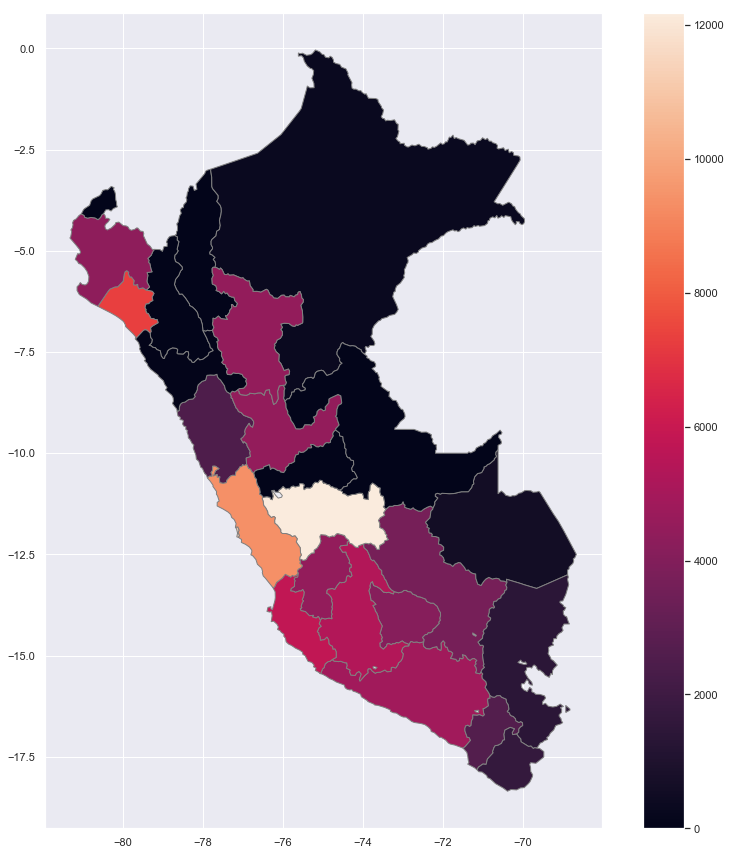

In [74]:
# MAPA DEL PERU CON LA CANTIDAD DE CASOS POSITIVOS A NIVEL DE CADA DEPARTAMENTO
ax = region_geojson.plot(column='CASOS_POSITIVOS',figsize=(15, 15),legend=True,edgecolor=u'gray')

In [75]:
# pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


In [76]:
# Importaremos la libreria mapclassify para clasificar nuestra mapa 
import mapclassify 

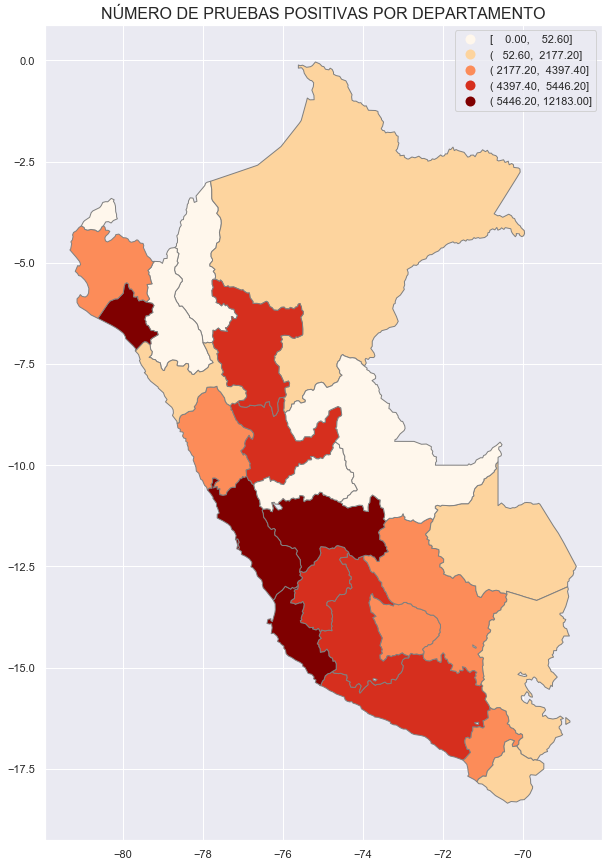

In [77]:
ax = region_geojson.plot(column='CASOS_POSITIVOS',scheme="quantiles",
                         figsize=(15, 15),legend={'title':'Categoria tamizaje'}, 
                         edgecolor=u'gray',cmap='OrRd');# Set2 #RdBu #OrRd
plt.title('NÚMERO DE PRUEBAS POSITIVAS POR DEPARTAMENTO',fontdict={'fontsize':16});

In [78]:
# GRAFICANDO CON HISTOGRAMAS

In [79]:
groupDepartamento = df_p.groupby(by=['Departamento']).sum()
groupDepartamento

Tamizaje 2017,Anio,NroMes,Ubigeo,NroTamizajes
Departamento,,,,
ANCASH,2327618,5343,24338606,2502
APURIMAC,5379339,11838,81136371,4129
AREQUIPA,5028381,10879,100540036,4865
AYACUCHO,4746001,12243,118540696,5368
CAJAMARCA,12102,14,364516,7
CALLAO,2533352,5258,88048697,11168
CUSCO,2616049,8218,104353451,3678
HUANCAVELICA,4685491,9437,209904833,4476
HUANUCO,5808960,13016,289332105,4512


In [80]:
# LLenando datos faltantes
groupDepartamento["NroTamizajes"]["AMAZONAS"]=0
groupDepartamento["NroTamizajes"]["TUMBES"]=0
groupDepartamento["NroTamizajes"]["UCAYALI"]=0
serieDepartamento = groupDepartamento["NroTamizajes"]
serieDepartamento

Departamento
ANCASH            2502
APURIMAC          4129
AREQUIPA          4865
AYACUCHO          5368
CAJAMARCA            7
CALLAO           11168
CUSCO             3678
HUANCAVELICA      4476
HUANUCO           4512
ICA               5759
JUNIN            12183
LA LIBERTAD         64
LAMBAYEQUE        7314
LIMA              9394
LORETO             323
MADRE DE DIOS      577
MOQUEGUA          2661
PASCO                7
PIURA             4345
PUNO              1421
SAN MARTIN        4484
TACNA             1690
Name: NroTamizajes, dtype: int64

In [81]:
# SUMA DE CASOS TOTALES
nro_casos_totales = (serieDepartamento.values).sum()
nro_casos_totales

90927

In [82]:
serieDepartamento.sort_values(ascending=False)

Departamento
JUNIN            12183
CALLAO           11168
LIMA              9394
LAMBAYEQUE        7314
ICA               5759
AYACUCHO          5368
AREQUIPA          4865
HUANUCO           4512
SAN MARTIN        4484
HUANCAVELICA      4476
PIURA             4345
APURIMAC          4129
CUSCO             3678
MOQUEGUA          2661
ANCASH            2502
TACNA             1690
PUNO              1421
MADRE DE DIOS      577
LORETO             323
LA LIBERTAD         64
CAJAMARCA            7
PASCO                7
Name: NroTamizajes, dtype: int64

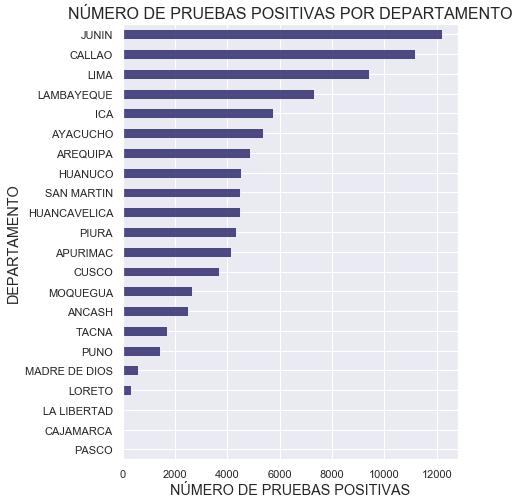

In [83]:
serieDepartamento= serieDepartamento.sort_values(ascending=True)
serieDepartamento.plot.barh(color="#232066",figsize=(6,8),alpha = 0.8); # ANCHO - ALTURA

plt.title('NÚMERO DE PRUEBAS POSITIVAS POR DEPARTAMENTO',fontdict={'fontsize':16})
plt.ylabel('DEPARTAMENTO',fontsize='large')
plt.xlabel('NÚMERO DE PRUEBAS POSITIVAS',fontsize='large')
plt.show()

In [84]:
# PORCENTAJE 
((serieDepartamento/nro_casos_totales)*100).sort_values(ascending=False)

# -- INTERPRETACION
# Los departamentos que tienen mayor número de priebas positivas son: 
# Junín 13.4%, Callao 12.3%, Lima 10% todos sobrepasan los 9 000 casos

# El 13% de toda mi data registrada pertenece a Ayacucho

Departamento
JUNIN            13.398660
CALLAO           12.282380
LIMA             10.331365
LAMBAYEQUE        8.043815
ICA               6.333652
AYACUCHO          5.903637
AREQUIPA          5.350446
HUANUCO           4.962222
SAN MARTIN        4.931429
HUANCAVELICA      4.922630
PIURA             4.778559
APURIMAC          4.541005
CUSCO             4.045003
MOQUEGUA          2.926523
ANCASH            2.751658
TACNA             1.858634
PUNO              1.562792
MADRE DE DIOS     0.634575
LORETO            0.355230
LA LIBERTAD       0.070386
CAJAMARCA         0.007698
PASCO             0.007698
Name: NroTamizajes, dtype: float64

#### Variable Sexo

In [85]:
# AGRUPAMIENTO POR SEXO - DATOS
groupSexo = df_p.groupby(by=['Sexo']).sum()

# Serie de la agrupacion
group_Sexo = groupSexo['NroTamizajes']
group_Sexo

Sexo
F    58194
M    32733
Name: NroTamizajes, dtype: int64

In [86]:
sum (group_Sexo.values)

90927

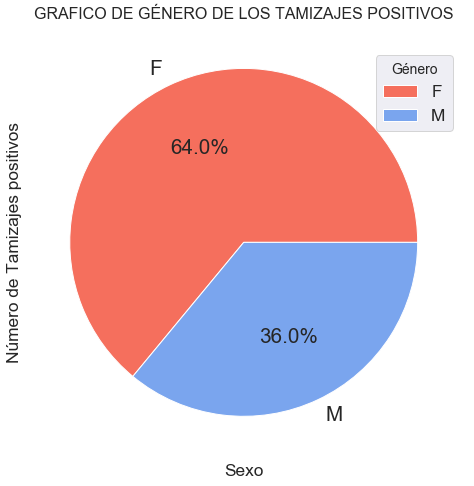

In [87]:
# AGRUPAMIENTO POR SEXO - GRAFICO

colores = ['#F56F5D', '#7AA5EE']
group_Sexo.plot(kind='pie',legend="True",autopct='%.1f%%',figsize=(8, 8),colors=colores,fontsize='xx-large')
plt.title('GRAFICO DE GÉNERO DE LOS TAMIZAJES POSITIVOS', fontdict={'fontsize':16})
plt.xlabel('Sexo',fontsize='x-large')
plt.ylabel('Número de Tamizajes positivos',fontsize='x-large')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95),
           borderpad=0.4,fontsize='x-large',
           title="Género",title_fontsize=14)
plt.show()

#### Variable RangoEdad

In [88]:
# AGRUPAMIENTO POR INTERVALO_EDAD vs SEXO  - cantidad de casos positivos
groupEtapaSexo = df_p.groupby(by=['RangoEdad','Sexo']).sum()
group_EtapaSexo = groupEtapaSexo['NroTamizajes']
# group_EtapaSexo 

In [89]:
# Convirtiendo lo anterior agrupamiento a un dataframe
df_EtapaSexo=pd.DataFrame(group_EtapaSexo)
df_EtapaSexo
check=df_EtapaSexo.reset_index(inplace=True)
df_EtapaSexo

,RangoEdad,Sexo,NroTamizajes
0,1 - 4,F,1977
1,1 - 4,M,2522
2,10 - 11,F,1664
3,10 - 11,M,1825
4,12 - 14,F,3735
5,12 - 14,M,2983
6,15 - 17,F,3913
7,15 - 17,M,2651
8,18 - 24,F,9000
9,18 - 24,M,3237


In [90]:
intervalo_edad=group_EtapaSexo.index.levels[0]
# intervalo_edad

In [91]:
def serieGraficoBarDouble(x,intervalo):
    personasM = dict()
    personasF = dict()
    arrayNew = ["M","F"]

    for element in intervalo:
        m = x.loc[(x["RangoEdad"] == element )  & (x["Sexo"] == "M")]['NroTamizajes'].sum()
        f = x.loc[(x["RangoEdad"] == element )  & (x["Sexo"] == "F")]['NroTamizajes'].sum()
        personasM[element] = m
        personasF[element] = f
        
    print("personasM",personasM)
    print("personasF",personasF)
    
    return pd.Series(personasM),pd.Series(personasF)

intervaloM,intervaloF = serieGraficoBarDouble(df_EtapaSexo,intervalo_edad)

personasM {'1 - 4': 2522, '10 - 11': 1825, '12 - 14': 2983, '15 - 17': 2651, '18 - 24': 3237, '25 - 29': 1733, '30 - 39': 3485, '40 - 59': 5092, '5 - 9': 5710, '60 - 79': 2764, '80  +': 531, '< 1': 200}
personasF {'1 - 4': 1977, '10 - 11': 1664, '12 - 14': 3735, '15 - 17': 3913, '18 - 24': 9000, '25 - 29': 5796, '30 - 39': 10612, '40 - 59': 11429, '5 - 9': 4503, '60 - 79': 4542, '80  +': 807, '< 1': 216}


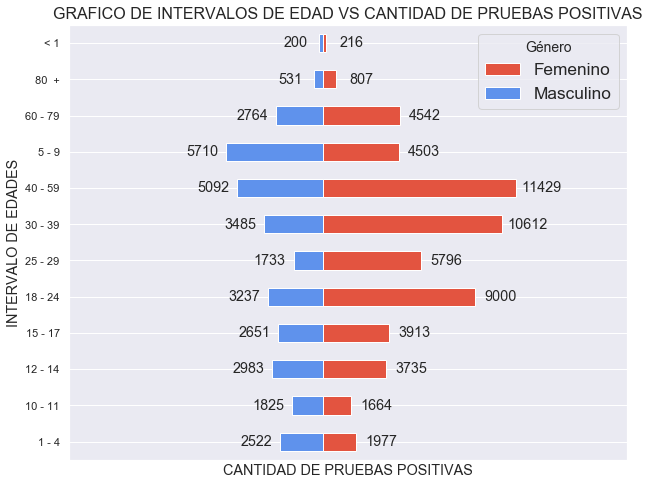

In [92]:
(intervaloF).plot.barh(color="#E35440" , figsize=(10,8),label = 'Femenino');
(intervaloM*-1).plot.barh(color="#5F92EC" , figsize=(10,8),label = 'Masculino');
   
n = 12
Y = np.arange(n)
for y,valueM,valueF in zip(Y,intervaloM*-1,intervaloF):
    pl.text(valueF +1500,y,valueF, ha='center', va='center',fontsize='large')
    pl.text(valueM -1400,y,valueM*-1, ha='center', va='center',fontsize='large')

pl.xlim(-15000, +18000)
plt.title('GRAFICO DE INTERVALOS DE EDAD VS CANTIDAD DE PRUEBAS POSITIVAS', fontdict={'fontsize':16})
plt.ylabel('INTERVALO DE EDADES',fontsize='large')
plt.xlabel('CANTIDAD DE PRUEBAS POSITIVAS',fontsize='large')
plt.xticks([])
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),
           borderpad=0.4,fontsize='x-large',
           title="Género",title_fontsize=14)
plt.show()

In [93]:
# AGRUPAMIENTO POR INTERVALO_EDAD- GRAFICO

groupEtapa = df_p.groupby(by=['RangoEdad']).sum()
groupEtapa

Tamizaje 2017,Anio,NroMes,Ubigeo,NroTamizajes
RangoEdad,,,,
1 - 4,3057772,7340,169193306,4499
10 - 11,3207030,7539,186888133,3489
12 - 14,5304710,13053,306433446,6718
15 - 17,5849300,14487,343639893,6564
18 - 24,8945395,21158,499292102,12237
25 - 29,6746865,15805,375187797,7529
30 - 39,10437975,24573,561573005,14097
40 - 59,12273445,28839,649477498,16521
5 - 9,5209911,12411,300483885,10213


In [94]:
groupEtapa["NroTamizajes"].sort_values(ascending=False)

RangoEdad
40 - 59    16521
30 - 39    14097
18 - 24    12237
5 - 9      10213
25 - 29     7529
60 - 79     7306
12 - 14     6718
15 - 17     6564
1 - 4       4499
10 - 11     3489
80  +       1338
< 1          416
Name: NroTamizajes, dtype: int64

In [95]:
# PORCENTAJE 
((groupEtapa["NroTamizajes"]/90927)*100).sort_values(ascending=False)

RangoEdad
40 - 59    18.169521
30 - 39    15.503646
18 - 24    13.458049
5 - 9      11.232087
25 - 29     8.280269
60 - 79     8.035017
12 - 14     7.388344
15 - 17     7.218978
1 - 4       4.947925
10 - 11     3.837144
80  +       1.471510
< 1         0.457510
Name: NroTamizajes, dtype: float64

#### Variable TipoDiagnostico

In [96]:
groupDetail = df_p.groupby(by=['TipoDiagnostico']).sum()
groupDetail

Tamizaje 2017,Anio,NroMes,Ubigeo,NroTamizajes
TipoDiagnostico,,,,
SINDROME Y/O TRASTORNO PSICOTICO,2265091,5499,116948397,1806
TRASTORNO DE CONSUMO DE ALCOHOL,9167265,21910,500660789,7648
TRASTORNO DE CONSUMO DE DROGAS,2862123,6729,160873759,2417
TRASTORNO DE CONSUMO DE TABACO,871344,2119,53309472,525
TRASTORNO DEPRESIVO,22080099,51422,1204580024,31511
VIOLENCIA FAMILIAR/MALTRATO INFANTIL,33302687,79821,1850449496,47020


In [97]:
sum (groupDetail["NroTamizajes"])

90927

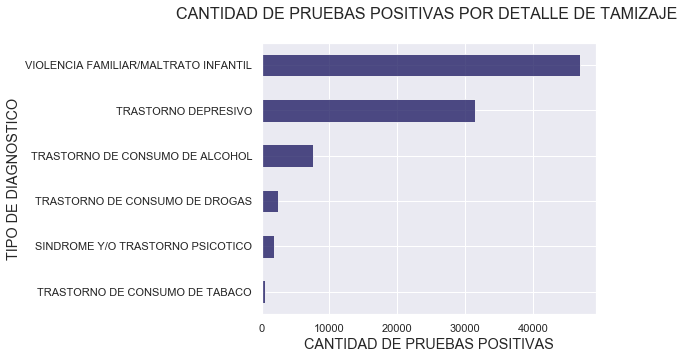

In [98]:
groupDetailCasos = groupDetail["NroTamizajes"].sort_values(ascending=True)
groupDetailCasos.plot.barh(color="#232066",figsize=(6,5),alpha = 0.8); # ANCHO - ALTURA

plt.title('CANTIDAD DE PRUEBAS POSITIVAS POR DETALLE DE TAMIZAJE \n',fontdict={'fontsize':16})
plt.ylabel('TIPO DE DIAGNOSTICO',fontsize='large')
plt.xlabel('CANTIDAD DE PRUEBAS POSITIVAS',fontsize='large')
plt.show()

In [99]:
# PORCENTAJE DE CASOS EN FUNCION AL TIPO DE DIAGNOSTICO
groupDetailCasos = groupDetailCasos.sort_values(ascending=False)
print((groupDetailCasos/90927)*100)

# OBSERVACION
# Los diagnostico más usuales son: 
# violencia familiar/ maltrato infantil, trastorno depresivo, transtorno de consumo de alcohol

TipoDiagnostico
VIOLENCIA FAMILIAR/MALTRATO INFANTIL    51.711813
TRASTORNO DEPRESIVO                     34.655273
TRASTORNO DE CONSUMO DE ALCOHOL          8.411143
TRASTORNO DE CONSUMO DE DROGAS           2.658176
SINDROME Y/O TRASTORNO PSICOTICO         1.986209
TRASTORNO DE CONSUMO DE TABACO           0.577386
Name: NroTamizajes, dtype: float64


#### Variable Casos

In [100]:
# El nro de Casos (Tamizajes Positivos) realizados para un determinado rango de edad y para una cierta ciudad.
df_p["NroTamizajes"].describe()

count    34977.000000
mean         2.599623
std          5.114950
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        174.000000
Name: NroTamizajes, dtype: float64

In [101]:
# INTERPRETACION - Casos - 
# - El # minimo de atenciones es 1 y como maximo 174
# - De todos los registros obtenidos solo el 25% tuvo este estos son de 2 a mas casos positivos 
# - El 50% de los registros nos dicen que los casos positivos para cierto intervalo y
#   cierto genero van desde 1 haa 2
# - El std = 5.11 => nuestros valores tienen dispersion
# - El cv = std/mean = 5.11/2.60 = 1.97 => datos no homogeneos

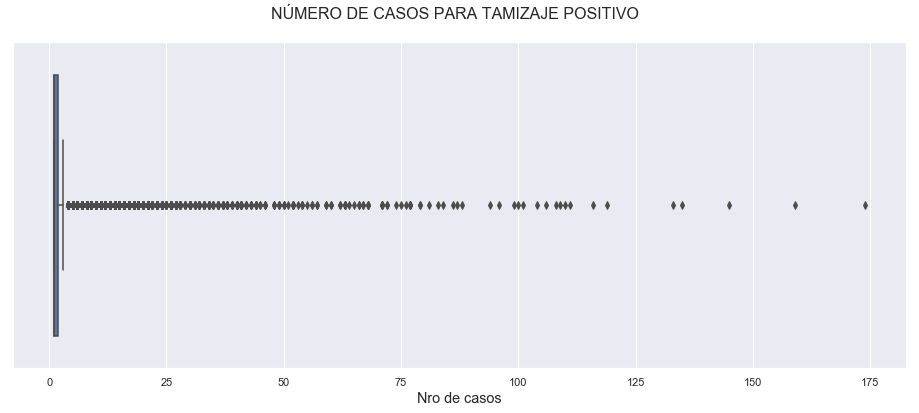

In [102]:
# CAJA BOX
plt.figure(figsize=(16,6));
sns.boxplot(df_p["NroTamizajes"]);
plt.title('NÚMERO DE CASOS PARA TAMIZAJE POSITIVO  \n',fontdict={'fontsize':16});
plt.xlabel('Nro de casos',fontsize='large');
plt.show();

In [103]:
# for numerica in varNumericas:
#   print("#"*20,numerica,"#"*20)
#   analisisNumericas(df, numerica)
#   print("\n\n")

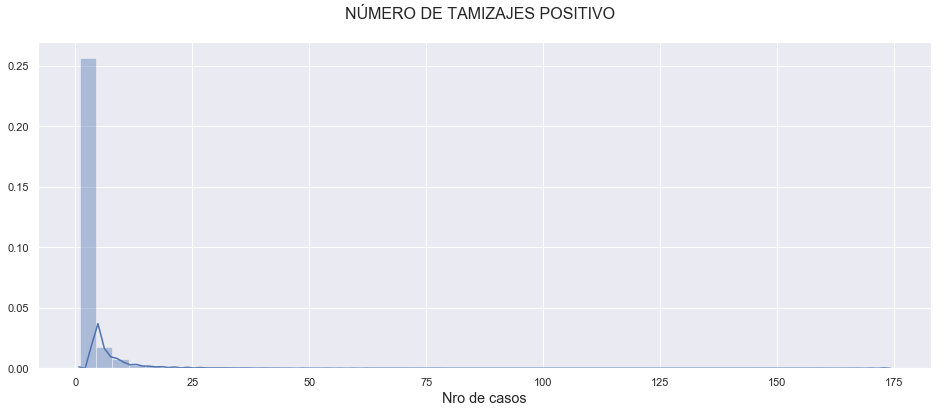

In [104]:
# Grafico de la distribucion de nuestras atenciones
# HISTOGRAMA
plt.figure(figsize=(16,6))
sns.distplot(df_p['NroTamizajes'])
plt.title('NÚMERO DE TAMIZAJES POSITIVO  \n',fontdict={'fontsize':16})
plt.xlabel('Nro de casos',fontsize='large')
plt.show()

**Intervalos de confianza para Nro de Casos**

---

In [105]:
import scipy.stats as st
import scipy as sp

In [106]:
a=df_p['NroTamizajes']
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(2.5460166284286667, 2.6532285898576355)

In [107]:
def mean_confidence_interval(data, confidence=0.95):
       a = 1.0*np.array(data)
       n = len(a)
       m, se = np.mean(a), st.sem(a)
       h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
       return m, m-h, m+h

In [108]:
a=df_p['NroTamizajes']
mean_confidence_interval(a)

(2.599622609143151, 2.5460166284286667, 2.6532285898576355)

In [109]:
# Interpretacion
# Con un nivel de confianza del 95%, se estima que el promedio de casos positivos registrados
# para un cierto intervalo de edad y con un determinado genero se encuentra entre [2.55 y 2.65]

In [110]:
# ASIMETRIA (11) > 0
# ASIMETRICA POSITIVA
df_p.skew()

Tamizaje 2017
Anio             0.000000
NroMes          -0.143011
Ubigeo           0.365985
NroTamizajes    11.709119
dtype: float64

In [111]:
# KURTOSIS
df_p.kurt()

# Interpretacion 
# Como ku > 3 =>  la distribución es Leptocúrtica

Tamizaje 2017
Anio              0.000000
NroMes           -1.166067
Ubigeo           -0.657758
NroTamizajes    218.308664
dtype: float64

In [112]:
# VARIABLES DATAFRAME INTERES

In [113]:
# Medidas de centralizacion

media = np.mean(df_p['NroTamizajes'])
print(f'La media es de: {media}')

mediana = df_p['NroTamizajes'].median()
print(f'La mediana es de: {mediana}')

moda= df_p['NroTamizajes'].mode()
print(f'La moda es: {moda}')

La media es de: 2.599622609143151
La mediana es de: 1.0
La moda es: 0    1
dtype: int64


In [114]:
df.kurt()
# 45.6 > 3 leptocurtica

Tamizaje 2017
SINDROME Y/O TRASTORNO PSICOTICO                      265.383020
TRASTORNO DE CONSUMO DE ALCOHOL                       108.681825
TRASTORNO DE CONSUMO DE DROGAS                        388.264662
TRASTORNO DE CONSUMO DE TABACO                        135.491620
TRASTORNO DEPRESIVO                                   473.486165
VIOLENCIA FAMILIAR/MALTRATO INFANTIL                  478.496651
SOLO TAMIZAJES POSITIVOS                              501.966802
TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA    307.789204
TOTAL DE TAMIZAJES                                     30.894072
dtype: float64

In [115]:
df.skew()

Tamizaje 2017
SINDROME Y/O TRASTORNO PSICOTICO                      14.613189
TRASTORNO DE CONSUMO DE ALCOHOL                        8.551238
TRASTORNO DE CONSUMO DE DROGAS                        17.188689
TRASTORNO DE CONSUMO DE TABACO                        10.319849
TRASTORNO DEPRESIVO                                   18.977934
VIOLENCIA FAMILIAR/MALTRATO INFANTIL                  18.945497
SOLO TAMIZAJES POSITIVOS                              19.527076
TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA    16.047537
TOTAL DE TAMIZAJES                                     4.563325
dtype: float64

In [116]:
# Medidas de centralizacion

media = np.mean(df['SINDROME Y/O TRASTORNO PSICOTICO'])
print(f'La media es de: {media}')

mediana = df['SINDROME Y/O TRASTORNO PSICOTICO'].median()
print(f'La mediana es de: {mediana}')

moda= df['SINDROME Y/O TRASTORNO PSICOTICO'].mode()
print(f'La moda es: {moda}')

media = np.mean(df['TRASTORNO DE CONSUMO DE ALCOHOL'])
print(f'La media es de: {media}')

mediana = df['TRASTORNO DE CONSUMO DE ALCOHOL'].median()
print(f'La mediana es de: {mediana}')

moda= df['TRASTORNO DE CONSUMO DE ALCOHOL'].mode()
print(f'La moda es: {moda}')

media = np.mean(df['SOLO TAMIZAJES POSITIVOS'])
print(f'La media es de: {media}')

mediana = df['SOLO TAMIZAJES POSITIVOS'].median()
print(f'La mediana es de: {mediana}')

moda= df['SOLO TAMIZAJES POSITIVOS'].mode()
print(f'La moda es: {moda}')

La media es de: 1.6226415094339623
La mediana es de: 0.0
La moda es: 0    0.0
dtype: float64
La media es de: 6.87151841868823
La mediana es de: 1.0
La moda es: 0    0.0
dtype: float64
La media es de: 81.69541778975741
La mediana es de: 10.0
La moda es: 0    0.0
dtype: float64


# 3.- Preparacion de los datos

**Nos centraremos en generar el conjunto de datos con el cual entrenamos en nuestro modelo**

## 3.1.- Seleccion de los Datos

Nuestro dataset ya esta creado a continuacion se mostrara, se tomara todas las variables

In [117]:
df.head(5)
df.set_index('Distrito')

Tamizaje 2017,Departamento,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES
Distrito,,,,,,,,,,
ACOPAMPA,ANCASH,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0
ANTA,ANCASH,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0
ATAQUERO,ANCASH,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0
CAJACAY,ANCASH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0
CARHUAZ,ANCASH,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0
...,...,...,...,...,...,...,...,...,...,...
ILABAYA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.0
QUILAHUANI,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0
SITAJARA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0


## 3.2.- Limpieza de Datos

**Corregimos anomalías como datos perdidos o valores outliers**

### 3.2.1.- Limpieza de Missings

In [118]:
analizadorNulos(df)

No existen Nulos


In [119]:
analizadorNulos(dfi)

No existen Nulos


### 3.2.1.- Tratamiento de Outliers

**Podemos topear la variable o discretizar**

In [120]:
df.loc[df['SINDROME Y/O TRASTORNO PSICOTICO'] >= 100,'SINDROME Y/O TRASTORNO PSICOTICO'] = 100
df.loc[df['TRASTORNO DE CONSUMO DE ALCOHOL'] >= 200,'TRASTORNO DE CONSUMO DE ALCOHOL'] = 200
df.loc[df['TRASTORNO DE CONSUMO DE DROGAS'] >= 100,'TRASTORNO DE CONSUMO DE DROGAS'] = 100
df.loc[df['TRASTORNO DE CONSUMO DE TABACO'] >= 20,'TRASTORNO DE CONSUMO DE TABACO'] = 20
df.loc[df['TRASTORNO DEPRESIVO'] >= 1000,'TRASTORNO DEPRESIVO'] = 1000
df.loc[df['VIOLENCIA FAMILIAR/MALTRATO INFANTIL'] >= 1050,'VIOLENCIA FAMILIAR/MALTRATO INFANTIL'] = 1050
df.loc[df['SOLO TAMIZAJES POSITIVOS'] >= 3500,'SOLO TAMIZAJES POSITIVOS'] = 3500
df.loc[df['TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA'] >= 300,'TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA'] = 300
df.loc[df['TOTAL DE TAMIZAJES'] >= 25000,'TOTAL DE TAMIZAJES'] = 25000

## 3.3.- Ingeniería de Variables

In [121]:
# Creamos la variable Ingreso Total

df["TOTAL GENERALIZADO"] = df["SOLO TAMIZAJES POSITIVOS"] + df["TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA"] + df["TOTAL DE TAMIZAJES"]
df

Tamizaje 2017,Departamento,Distrito,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES,TOTAL GENERALIZADO
0,ANCASH,ACOPAMPA,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0,559.0
1,ANCASH,ANTA,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0,872.0
2,ANCASH,ATAQUERO,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0,816.0
3,ANCASH,CAJACAY,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0,523.0
4,ANCASH,CARHUAZ,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0,2717.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,TACNA,ILABAYA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.0,1275.0
1109,TACNA,QUILAHUANI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,1150.0
1110,TACNA,SITAJARA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,270.0
1111,UCAYALI,IPARIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756.0,756.0


In [122]:
# Agregando variables ratios 
df["Ratio T PSICOTICO positivo"] = df["SINDROME Y/O TRASTORNO PSICOTICO"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio T ALCOHOL positivo"] = df["TRASTORNO DE CONSUMO DE ALCOHOL"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio T DROGAS positivo"] = df["TRASTORNO DE CONSUMO DE DROGAS"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio T TABACO positivo"] = df["TRASTORNO DE CONSUMO DE TABACO"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio T DEPRESIVO positivo"] = df["TRASTORNO DEPRESIVO"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio VIOLENCIA positivo"] = df["VIOLENCIA FAMILIAR/MALTRATO INFANTIL"]/ df["SOLO TAMIZAJES POSITIVOS"].sum()
df["Ratio Tamizaje Nopositivo"] = df["TOTAL DE TAMIZAJES"]/ df["TOTAL GENERALIZADO"].sum()
df["Ratio Tamizaje positivo"] = df["SOLO TAMIZAJES POSITIVOS"]/ df["TOTAL GENERALIZADO"].sum()
df["Ratio Tamizaje positivo condicion"] = df["TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA"]/ df["TOTAL GENERALIZADO"].sum()
print("Listoo !!")

Listoo !!


In [123]:
#Visualizamos las nuevas variables
df=df.set_index('Distrito')
df.head()

Tamizaje 2017,Departamento,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES,TOTAL GENERALIZADO,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo,Ratio Tamizaje positivo condicion
Distrito,,,,,,,,,,,,,,,,,,,,
ACOPAMPA,ANCASH,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0,559.0,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,0.000245,1.838688e-05,0.0
ANTA,ANCASH,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0,872.0,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,0.000403,8.486251e-06,0.0
ATAQUERO,ANCASH,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0,816.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000384,4.714584e-07,0.0
CAJACAY,ANCASH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0,523.0,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000246,4.714584e-07,0.0
CARHUAZ,ANCASH,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0,2717.0,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,0.001203,7.779063e-05,0.0


Veamos rapidamente el analisis de mis variables ratios 

In [124]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

Tamizaje 2017,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES,TOTAL GENERALIZADO,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo,Ratio Tamizaje positivo condicion
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000
mean,1.465409,6.668464,1.925427,0.437556,25.539982,38.172507,76.442947,4.283917,1825.003594,1905.730458,0.000017,0.000078,0.000023,0.000005,0.000300,0.000449,0.000860,3.603967e-05,0.000002
std,6.829957,17.814458,8.054826,1.784705,86.428186,101.298400,221.865028,22.350227,2962.574432,3112.412192,0.000080,0.000209,0.000095,0.000021,0.001016,0.001191,0.001397,1.046001e-04,0.000011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.400000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,276.000000,289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000130,4.714584e-07,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,10.000000,0.000000,759.000000,789.000000,0.000000,0.000012,0.000000,0.000000,0.000012,0.000047,0.000358,4.714584e-06,0.000000
75%,0.000000,5.000000,0.000000,0.000000,13.000000,25.000000,53.000000,0.000000,2077.000000,2178.000000,0.000000,0.000059,0.000000,0.000000,0.000153,0.000294,0.000979,2.498729e-05,0.000000
90%,2.000000,18.000000,4.000000,1.000000,58.800000,107.000000,199.000000,4.000000,4457.800000,4692.600000,0.000024,0.000212,0.000047,0.000012,0.000691,0.001258,0.002102,9.382022e-05,0.000002
max,100.000000,200.000000,100.000000,20.000000,1000.000000,1050.000000,3500.000000,300.000000,25000.000000,28504.000000,0.001175,0.002351,0.001175,0.000235,0.011754,0.012341,0.011786,1.650104e-03,0.000141


In [125]:
predictoras = ['Ratio T PSICOTICO positivo','Ratio T ALCOHOL positivo','Ratio T DROGAS positivo',
               'Ratio T TABACO positivo','Ratio T DEPRESIVO positivo','Ratio VIOLENCIA positivo']

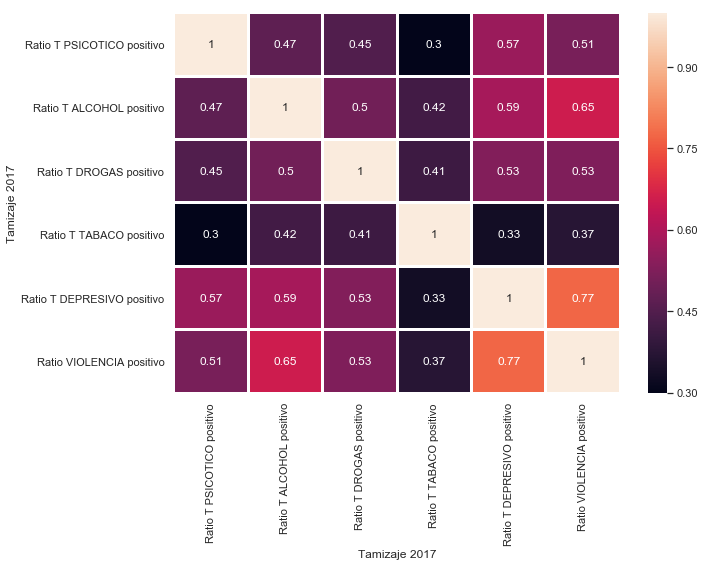

In [126]:
# Analisis de correlacion de mis variables ratios
plt.figure(figsize=(10,7))
sns.heatmap(df[predictoras].corr(method='spearman'), annot=True, linewidths=2)

## 3.4.- Formateo de los Datos

In [127]:
df.info() # Todas son numericas

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, ACOPAMPA to MASISEA
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Departamento                                        1113 non-null   object 
 1   SINDROME Y/O TRASTORNO PSICOTICO                    1113 non-null   float64
 2   TRASTORNO DE CONSUMO DE ALCOHOL                     1113 non-null   float64
 3   TRASTORNO DE CONSUMO DE DROGAS                      1113 non-null   float64
 4   TRASTORNO DE CONSUMO DE TABACO                      1113 non-null   float64
 5   TRASTORNO DEPRESIVO                                 1113 non-null   float64
 6   VIOLENCIA FAMILIAR/MALTRATO INFANTIL                1113 non-null   float64
 7   SOLO TAMIZAJES POSITIVOS                            1113 non-null   float64
 8   TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA  1113 non-null   float

In [128]:
df.columns

Index(['Departamento', 'SINDROME Y/O TRASTORNO PSICOTICO',
       'TRASTORNO DE CONSUMO DE ALCOHOL', 'TRASTORNO DE CONSUMO DE DROGAS',
       'TRASTORNO DE CONSUMO DE TABACO', 'TRASTORNO DEPRESIVO',
       'VIOLENCIA FAMILIAR/MALTRATO INFANTIL', 'SOLO TAMIZAJES POSITIVOS',
       'TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA',
       'TOTAL DE TAMIZAJES', 'TOTAL GENERALIZADO',
       'Ratio T PSICOTICO positivo', 'Ratio T ALCOHOL positivo',
       'Ratio T DROGAS positivo', 'Ratio T TABACO positivo',
       'Ratio T DEPRESIVO positivo', 'Ratio VIOLENCIA positivo',
       'Ratio Tamizaje Nopositivo', 'Ratio Tamizaje positivo',
       'Ratio Tamizaje positivo condicion'],
      dtype='object', name='Tamizaje 2017')

# 4.- Modelado

**Nuestro objetivo principal es obtener el modelo**

In [129]:
# Elegimos las variables predictoras
predictoras = ['Ratio T PSICOTICO positivo','Ratio T ALCOHOL positivo','Ratio T DROGAS positivo',
               'Ratio T TABACO positivo','Ratio T DEPRESIVO positivo','Ratio VIOLENCIA positivo',
              'Ratio Tamizaje positivo','Ratio Tamizaje Nopositivo','Ratio Tamizaje positivo condicion']

In [130]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]

#Visualizamos las variables X
print('\n\nVisualizamos las variables (X)')
display(X)



Visualizamos las variables (X)


Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
Distrito,,,,,,,,,
ACOPAMPA,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,1.838688e-05,0.000245,0.0
ANTA,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,8.486251e-06,0.000403,0.0
ATAQUERO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,4.714584e-07,0.000384,0.0
CAJACAY,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,4.714584e-07,0.000246,0.0
CARHUAZ,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,7.779063e-05,0.001203,0.0
...,...,...,...,...,...,...,...,...,...
ILABAYA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000601,0.0
QUILAHUANI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000542,0.0
SITAJARA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000127,0.0


### 4.1.- K Means ++

In [131]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3,random_state=123)

In [132]:
# Entrenamiento del modelo
kmeans.fit(X)

KMeans(n_clusters=3, random_state=123)

In [133]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[7.28435819e-06, 3.79936170e-05, 1.07329915e-05, 2.67445035e-06,
        1.16338590e-04, 1.87481316e-04, 1.45587477e-05, 5.19973425e-04,
        1.18758578e-06],
       [8.25049993e-05, 3.82910772e-04, 1.06933854e-04, 2.06262498e-05,
        1.36617217e-03, 2.42571612e-03, 1.76496454e-04, 3.56193740e-03,
        8.48162872e-06],
       [3.83947846e-04, 1.12311275e-03, 3.91783516e-04, 1.04475604e-04,
        8.68714650e-03, 7.12001243e-03, 8.35738557e-04, 8.14543883e-03,
        2.14251642e-05]])

In [134]:
X.columns

Index(['Ratio T PSICOTICO positivo', 'Ratio T ALCOHOL positivo',
       'Ratio T DROGAS positivo', 'Ratio T TABACO positivo',
       'Ratio T DEPRESIVO positivo', 'Ratio VIOLENCIA positivo',
       'Ratio Tamizaje positivo', 'Ratio Tamizaje Nopositivo',
       'Ratio Tamizaje positivo condicion'],
      dtype='object', name='Tamizaje 2017')

In [135]:
pd.DataFrame(clus_cent, columns=X.columns)

# Interpretacion

# El ratio promedio 

# En el cluster 2 se ve que hay mayor ratio de diagonostico psicotico, alcohol, tabaco, etc 
# - Aqui se conmcentra los mayores promedios de casos de problemas de salud mental
# - En estos distritos se deberia de dar mas prioridad para facilitar las consultas de psiquiatras 

# En el cluster 1 es el cluster intermedio  

# En el custer 0 
# se ve que es el q tiene menor ratio de diagonostico psicotico, alcohol, tabaco, etc

Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
0,0.000007,0.000038,0.000011,0.000003,0.000116,0.000187,0.000015,0.000520,0.000001
1,0.000083,0.000383,0.000107,0.000021,0.001366,0.002426,0.000176,0.003562,0.000008
2,0.000384,0.001123,0.000392,0.000104,0.008687,0.007120,0.000836,0.008145,0.000021


In [136]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [137]:
#Creando la columna Cluster
df['Cluster'] = kmeans.labels_
df.head(5)

Tamizaje 2017,Departamento,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES,...,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo,Ratio Tamizaje positivo condicion,Cluster
Distrito,,,,,,,,,,,,,,,,,,,,,
ACOPAMPA,ANCASH,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0,...,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,0.000245,1.838688e-05,0.0,0
ANTA,ANCASH,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0,...,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,0.000403,8.486251e-06,0.0,0
ATAQUERO,ANCASH,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000384,4.714584e-07,0.0,0
CAJACAY,ANCASH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0,...,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000246,4.714584e-07,0.0,0
CARHUAZ,ANCASH,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0,...,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,0.001203,7.779063e-05,0.0,0


In [139]:
# COMPUTADORA
# df.to_csv(r'./dataset/dataSaludMental_kmeans.csv', index = True)
print(" Todo ok !!")

 Todo ok !!


In [140]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))
# print('Silueta: '+str(metrics.silhouette_score(X,kmeans.labels_, metric='euclidean')))
print('Silueta: '+str(metrics.silhouette_score(X,kmeans.labels_))) # Por default es euclidiana

# La inercia mide la distancia que tienes con respecto al centro
# Inercia es el error cuadratico

Inercia: 0.0019500748563943747
Silueta: 0.7515392582690363


In [141]:
X

Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
Distrito,,,,,,,,,
ACOPAMPA,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,1.838688e-05,0.000245,0.0
ANTA,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,8.486251e-06,0.000403,0.0
ATAQUERO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,4.714584e-07,0.000384,0.0
CAJACAY,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,4.714584e-07,0.000246,0.0
CARHUAZ,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,7.779063e-05,0.001203,0.0
...,...,...,...,...,...,...,...,...,...
ILABAYA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000601,0.0
QUILAHUANI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000542,0.0
SITAJARA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000127,0.0


### 4.2.- K Means (Escalado Estandar)

In [142]:
#Obtenemos la funcion para escalar por la media y la desviacion estandar
from sklearn.preprocessing import StandardScaler
#Creamos el objeto scaler
scaler = StandardScaler()

In [143]:
#Visualizamos la data antes de Escalar
print("Data antes de Estandarizar...")
display(X.head(5))
X_Scaled_Media = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
print("\nData despues de Estandarizar...")
display(X_Scaled_Media.head(5))

Data antes de Estandarizar...


Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
Distrito,,,,,,,,,
ACOPAMPA,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,1.838688e-05,0.000245,0.0
ANTA,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,8.486251e-06,0.000403,0.0
ATAQUERO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,4.714584e-07,0.000384,0.0
CAJACAY,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,4.714584e-07,0.000246,0.0
CARHUAZ,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,7.779063e-05,0.001203,0.0



Data despues de Estandarizar...


Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
0,1.543103,-0.262178,-0.239148,-0.245280,-0.156732,-0.248610,-0.168840,-0.440694,-0.191758
1,-0.214653,0.074778,-0.239148,1.436426,-0.295638,-0.307868,-0.263535,-0.327904,-0.191758
2,-0.214653,-0.374497,-0.239148,-0.245280,-0.295638,-0.367125,-0.340193,-0.341074,-0.191758
3,-0.214653,-0.318338,-0.239148,-0.245280,-0.295638,-0.377002,-0.340193,-0.440019,-0.191758
4,0.664225,1.534923,0.133467,-0.245280,0.086353,0.501986,0.399328,0.245504,-0.191758


In [144]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3)

In [145]:
# Entrenamiento del modelo
kmeans.fit(X_Scaled_Media)

KMeans(n_clusters=3)

In [146]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[-0.15280238, -0.19076287, -0.16213073, -0.14100125, -0.18347194,
        -0.21452939, -0.20653453, -0.1830484 , -0.07681244],
       [ 5.53990445,  5.95547134,  4.83551307,  5.36040631,  9.29714481,
         6.59281749,  8.98111468,  4.99539101,  2.34051393],
       [ 1.29408767,  1.69029748,  1.45418032,  1.174827  ,  1.34808303,
         1.90902376,  1.6330142 ,  1.67788264,  0.68508709]])

In [147]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [148]:
pd.DataFrame(clus_cent, columns=X.columns)

Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
0,-0.152802,-0.190763,-0.162131,-0.141001,-0.183472,-0.214529,-0.206535,-0.183048,-0.076812
1,5.539904,5.955471,4.835513,5.360406,9.297145,6.592817,8.981115,4.995391,2.340514
2,1.294088,1.690297,1.454180,1.174827,1.348083,1.909024,1.633014,1.677883,0.685087


In [149]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))
print('Silueta: '+str(metrics.silhouette_score(X,kmeans.labels_)))

Inercia: 5480.6080823360735
Silueta: 0.7332413792752337


### 4.3.- K Means (Escalado Min Max)

In [150]:
#Obtenemos la funcion para escalar por el maximo y el minimo
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto scaler
scaler = MinMaxScaler()

In [151]:
#Visualizamos la data antes de Escalar
print("Data antes de Estandarizar...")
display(X.head(5))
X_Scaled_MinMax = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
print("\nData despues de Estandarizar...")
display(X_Scaled_MinMax.head(5))

Data antes de Estandarizar...


Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
Distrito,,,,,,,,,
ACOPAMPA,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,1.838688e-05,0.000245,0.0
ANTA,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,8.486251e-06,0.000403,0.0
ATAQUERO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,4.714584e-07,0.000384,0.0
CAJACAY,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,4.714584e-07,0.000246,0.0
CARHUAZ,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,7.779063e-05,0.001203,0.0



Data despues de Estandarizar...


Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
0,0.12,0.010,0.00,0.00,0.012,0.012381,0.011143,0.02080,0.0
1,0.00,0.040,0.00,0.15,0.000,0.006667,0.005143,0.03416,0.0
2,0.00,0.000,0.00,0.00,0.000,0.000952,0.000286,0.03260,0.0
3,0.00,0.005,0.00,0.00,0.000,0.000000,0.000286,0.02088,0.0
4,0.06,0.170,0.03,0.00,0.033,0.084762,0.047143,0.10208,0.0


In [152]:
# Importamos el Modelo de K Means
from sklearn.cluster import KMeans
# Importamos el modulo de metricas
from sklearn import metrics
# Creamos el modelo de K Means
kmeans = KMeans(n_clusters = 3)

In [153]:
# Entrenamiento del modelo
kmeans.fit(X_Scaled_MinMax)

KMeans(n_clusters=3)

In [154]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[0.08485714, 0.16690476, 0.11619048, 0.09952381, 0.12871429,
        0.19904762, 0.1128    , 0.29628305, 0.05984127],
       [0.00464535, 0.01562438, 0.00636364, 0.01038961, 0.0091009 ,
        0.01484325, 0.00832025, 0.04544108, 0.00828172],
       [0.39285714, 0.56357143, 0.40857143, 0.5       , 0.82871429,
        0.67210884, 0.59089796, 0.66470286, 0.18857143]])

In [155]:
pd.DataFrame(clus_cent, columns=X.columns)

Tamizaje 2017,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo condicion
0,0.084857,0.166905,0.116190,0.099524,0.128714,0.199048,0.112800,0.296283,0.059841
1,0.004645,0.015624,0.006364,0.010390,0.009101,0.014843,0.008320,0.045441,0.008282
2,0.392857,0.563571,0.408571,0.500000,0.828714,0.672109,0.590898,0.664703,0.188571


In [156]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [157]:
# Obtenemos los indicadores de clustering:
print('Inercia: '+str(kmeans.inertia_))
print('Silueta: '+str(metrics.silhouette_score(X,kmeans.labels_)))

Inercia: 40.431353464963
Silueta: 0.7483030515135041


### 4.2.- K Means(Optimo)

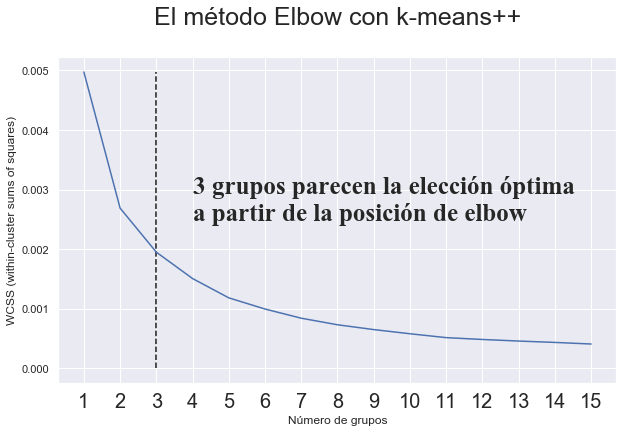

In [158]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 16), wcss)
plt.grid(True)
plt.title('El método Elbow con k-means++\n',fontsize=25)
plt.xlabel('Número de grupos')
plt.xticks(range(1, 16), fontsize=20)
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.vlines(x=3, ymin=0, ymax = max(wcss), linestyles='--')
plt.text(x=4, y=max(wcss) / 2, s='3 grupos parecen la elección óptima\na partir de la posición de elbow ',
          fontsize=25,fontdict={'family':'Times New Roman'})
plt.show()

In [159]:
wcss # Matriz de error

[0.004971830754227177,
 0.0026887697122660896,
 0.0019503077369513102,
 0.001507860529300131,
 0.0011841741695771454,
 0.0009967443562343622,
 0.0008428099728150786,
 0.0007328319461447823,
 0.0006521957567695542,
 0.0005822486093205721,
 0.0005171580732501507,
 0.00048623085856429283,
 0.00045982677251042166,
 0.0004369266633928307,
 0.00041008313023496793]

In [160]:
# pip install scikit-learn-extra

number clusters  2
Inercia:  0.0026887697122660896
Silhouette Score:  0.7926472654455952
number clusters  3
Inercia:  0.0019503077369513102
Silhouette Score:  0.7481895830854542
number clusters  4
Inercia:  0.001507860529300131
Silhouette Score:  0.7555303683314899
number clusters  5
Inercia:  0.001189263244962092
Silhouette Score:  0.5901900726464685
number clusters  6
Inercia:  0.0009965331926149901
Silhouette Score:  0.6000242359355438
number clusters  7
Inercia:  0.0008371675776999201
Silhouette Score:  0.6001843491473683
number clusters  8
Inercia:  0.0007328072411812526
Silhouette Score:  0.5874086612040575
number clusters  9
Inercia:  0.000661818110146529
Silhouette Score:  0.5964847010851899
number clusters  10
Inercia:  0.0005799027231454321
Silhouette Score:  0.6071231291080276


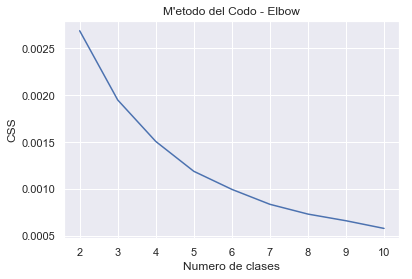

In [161]:
# METODO DE LA SILUETA 

css_vector = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    labels_tmp= kmeans.labels_
    css_vector.append(kmeans.inertia_)
  
    print("number clusters ", i)
    print('Inercia: ',kmeans.inertia_)
    print('Silhouette Score: ', metrics.silhouette_score(X,labels_tmp, metric='euclidean'))

plt.plot(range(2,11), css_vector)
plt.title("M'etodo del Codo - Elbow")
plt.xlabel("Numero de clases")
plt.ylabel('CSS')
plt.show()

### 4.5 ADICIONAL para explicar nuestro modelo


In [162]:
# ARMANDO VISTAS 
dep_dist_cluster= df.copy(deep=True)
dep_dist_cluster

Tamizaje 2017,Departamento,SINDROME Y/O TRASTORNO PSICOTICO,TRASTORNO DE CONSUMO DE ALCOHOL,TRASTORNO DE CONSUMO DE DROGAS,TRASTORNO DE CONSUMO DE TABACO,TRASTORNO DEPRESIVO,VIOLENCIA FAMILIAR/MALTRATO INFANTIL,SOLO TAMIZAJES POSITIVOS,TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA,TOTAL DE TAMIZAJES,...,Ratio T PSICOTICO positivo,Ratio T ALCOHOL positivo,Ratio T DROGAS positivo,Ratio T TABACO positivo,Ratio T DEPRESIVO positivo,Ratio VIOLENCIA positivo,Ratio Tamizaje Nopositivo,Ratio Tamizaje positivo,Ratio Tamizaje positivo condicion,Cluster
Distrito,,,,,,,,,,,,,,,,,,,,,
ACOPAMPA,ANCASH,12.0,2.0,0.0,0.0,12.0,13.0,39.0,0.0,520.0,...,0.000141,0.000024,0.000000,0.000000,0.000141,0.000153,0.000245,1.838688e-05,0.0,0
ANTA,ANCASH,0.0,8.0,0.0,3.0,0.0,7.0,18.0,0.0,854.0,...,0.000000,0.000094,0.000000,0.000035,0.000000,0.000082,0.000403,8.486251e-06,0.0,0
ATAQUERO,ANCASH,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,815.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000384,4.714584e-07,0.0,0
CAJACAY,ANCASH,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,522.0,...,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000246,4.714584e-07,0.0,0
CARHUAZ,ANCASH,6.0,34.0,3.0,0.0,33.0,89.0,165.0,0.0,2552.0,...,0.000071,0.000400,0.000035,0.000000,0.000388,0.001046,0.001203,7.779063e-05,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ILABAYA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1275.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000601,0.000000e+00,0.0,0
QUILAHUANI,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000542,0.000000e+00,0.0,0
SITAJARA,TACNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000127,0.000000e+00,0.0,0


In [163]:
df_cluster = pd.crosstab(index=[dep_dist_cluster["Departamento"]],
                columns=[dep_dist_cluster['Cluster'],])
df_cluster

Cluster,0,1,2
Departamento,,,
ANCASH,61,0,1
APURIMAC,73,8,0
AREQUIPA,47,2,0
AYACUCHO,104,10,1
CAJAMARCA,6,0,0
CALLAO,3,2,1
CUSCO,83,4,0
HUANCAVELICA,87,7,1
HUANUCO,65,13,0


In [164]:
# NUESTRO DATASET DEPENDIENDO DE NUESTRA CLUSTERIZACION 
Cluster2 =[ #Pruebas positivas 2017
    0,
    0,
    8,
    2,
    10,
    0,
    2,
    4,
    7,
    13,
    8,
    13,
    0,
    11,
    8,
    0,
    1,
    1,
    0,
    6,
    0,
    4,
    4,
    0,
    0
    ]
region_geojson["CLUSTER_2"] = Cluster2
# region_geojson.head(30)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,HABITANTES_2017,CASOS_POSITIVOS,CLUSTER_2
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",157560,0,0
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",686728,2502,0
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",185964,4129,8
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",1268941,4865,2
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",358045,5368,10


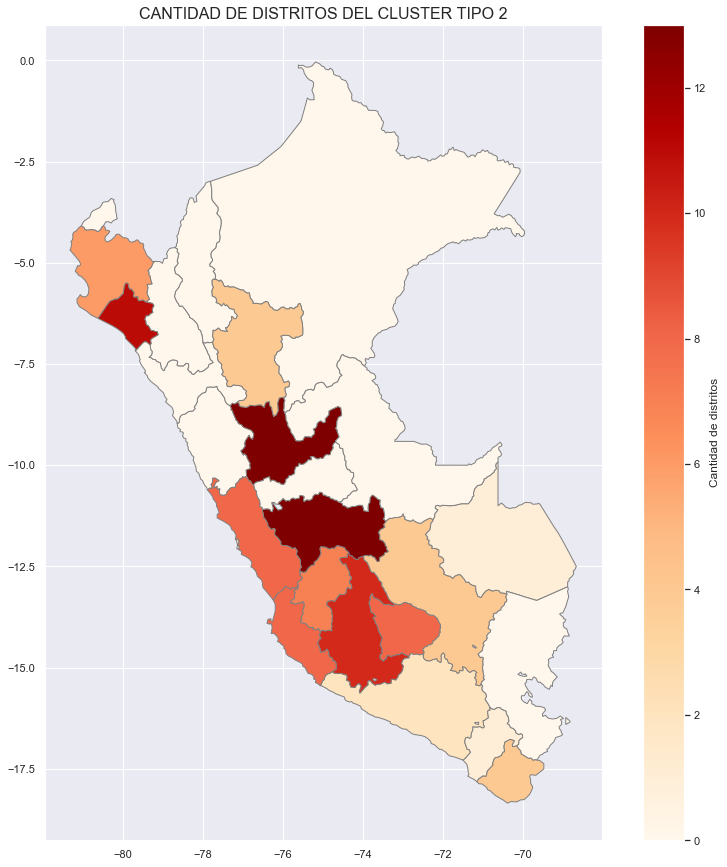

In [165]:
mapa_cluster2 = region_geojson.plot(column='CLUSTER_2',
                                    figsize=(15, 15),
                                    legend=True,
                                    legend_kwds={
                                        'label': "Cantidad de distritos",
                                        'orientation': "vertical"
                                    },
                                    edgecolor=u'gray',
                                    cmap='OrRd')

#  edgecolor=u'gray',cmap='OrRd')# Set2 #RdBu #OrRd
plt.title('CANTIDAD DE DISTRITOS DEL CLUSTER TIPO 2',fontdict={'fontsize':16});

### GRACIAS TOTALES NOV 2020